# Initialization of the data set

### 1. Importing relevant libaries to perform cleaning and EDA steps.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import shap
from xgboost import XGBClassifier
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt


### 2. Read data from a CSV (Comma-Separated Values) file and store it in a pandas DataFrame.

In [2]:
df = pd.read_csv('/Users/krishnanand/Desktop/heart_disease.csv')

### 3. Display the first few rows of the DataFrame

In [3]:
df.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


### 4.  Display the dimensions of the DataFrame (Rows, Columns)

In [4]:
df.shape

(4238, 16)

### 5. Display the series with the data type of each column in the DataFrame.

In [5]:
df.dtypes

Gender              object
age                  int64
education           object
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke     object
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
Heart_ stroke       object
dtype: object

---
---
# DATA CLEANING STEPS


# DATA CLEANING STEP 1: RENAMING COLUMNS

In this section, we are renaming some columns in the dataset for better clarity and consistency. The original column names were not as descriptive or consistent, and we aim to make them more understandable.


## Original Column Names

1. Gender              
2. age                  
3. education           
4. currentSmoker        
5. cigsPerDay         
6. BPMeds             
7. prevalentStroke     
8. prevalentHyp         
9. diabetes             
10. totChol            
11. sysBP              
12. diaBP              
13. BMI                
14. heartRate          
15. glucose            
16. Heart_ stroke   

## Renamed Columns

After careful consideration, we have renamed the columns as follows:

1. Gender                          
2. Age                             
3. Education_Level                 
4. Is_Smoker                       
5. Cigarettes_Per_Day              
6. Systolic_BP                  
7. Diastolic_BP                 
8. Has_BP_Meds                     
9. Has_Prevalent_Hypertension     
10. Glucose                         
11. Has_Diabetes                    
12. BMI                            
13. Heart_Rate                      
14. Total_Cholestrol                
15. Has_Prevalent_Stroke            
16. Heart_Stroke    




In [6]:
# RENAMING FEATURES
df = df.rename(columns={"age": "Age",
                        "Heart_ stroke" : "Heart_Stroke",
                        "education": "Education_Level",
                        "currentSmoker":"Is_Smoker",
                        "cigsPerDay":"Cigarettes_Per_Day",
                        "BPMeds":"Has_BP_Meds",
                        "prevalentStroke":"Has_Prevalent_Stroke",
                        "prevalentHyp":"Has_Prevalent_Hypertension" ,
                        "diabetes":"Has_Diabetes",
                        "totChol":"Total_Cholestrol",
                        "sysBP":"Systolic_BP",
                        "diaBP":"Diastolic_BP",
                        "heartRate":"Heart_Rate",
                        "glucose":"Glucose"})

df.dtypes

Gender                         object
Age                             int64
Education_Level                object
Is_Smoker                       int64
Cigarettes_Per_Day            float64
Has_BP_Meds                   float64
Has_Prevalent_Stroke           object
Has_Prevalent_Hypertension      int64
Has_Diabetes                    int64
Total_Cholestrol              float64
Systolic_BP                   float64
Diastolic_BP                  float64
BMI                           float64
Heart_Rate                    float64
Glucose                       float64
Heart_Stroke                   object
dtype: object

In [7]:
category_counts = df['Has_Prevalent_Stroke'].value_counts()

# Calculate the percentage of each category
category_percentages = (category_counts / len(df)) * 100

print("Category Counts:")
print(category_counts)
print("\nCategory Percentages:")
print(category_percentages)

Category Counts:
no     4213
yes      25
Name: Has_Prevalent_Stroke, dtype: int64

Category Percentages:
no     99.410099
yes     0.589901
Name: Has_Prevalent_Stroke, dtype: float64


# DATA CLEANING STEP 2: REARRANGING COLUMNS FOR BETTER READABILITY

In this section, we are rearranging the columns in the dataset to group relevant features together, improving the overall readability of the data.

We have rearranged certain columns, so that their information can be read better when they are next to each other. 
For example:
    Columns 'Systolic_BP','Diastolic_BP', 'Has_BP_Meds' are grouped together to understand the Blood Pressure information of a person with better readability
    Similarly, 'Glucose'  and 'Has_Diabetes', 'BMI' and  'BMI_Category', 'Heart_Rate', 'Total_Cholestrol' ,
                         'Has_Prevalent_Stroke' and 'Heart_Stroke are grouped together.

In [8]:
# Rearranging Columns of DataFrame 
df = df.reindex(columns=['Gender', 'Age', 'Education_Level' ,'Is_Smoker','Cigarettes_Per_Day','Systolic_BP',
                         'Diastolic_BP', 'Has_BP_Meds', 'Has_Prevalent_Hypertension'  , 'Glucose' ,
                         'Has_Diabetes' , 'BMI' , 'Heart_Rate', 'Total_Cholestrol' ,
                         'Has_Prevalent_Stroke' , 'Heart_Stroke' ])

---
# [EARLY STAGE EDA] __EDA 1__: OUTLIER DETECTION 


In this section, we will detect the outlier for all of our numeric value columns. It is important to detect them at the early stage because they may significantly impact our analysis. 

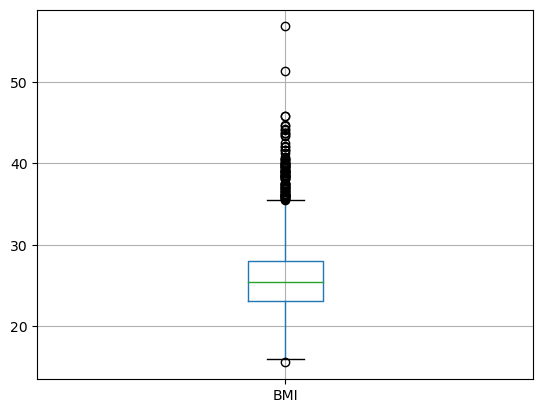

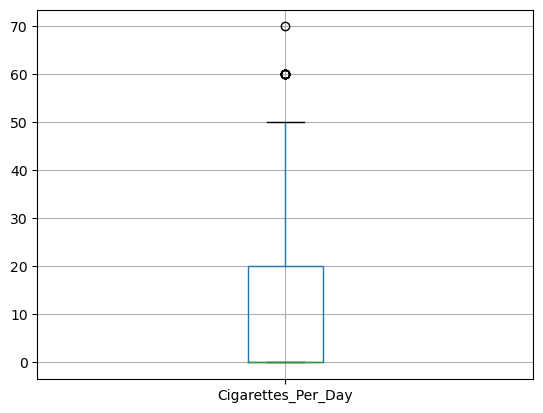

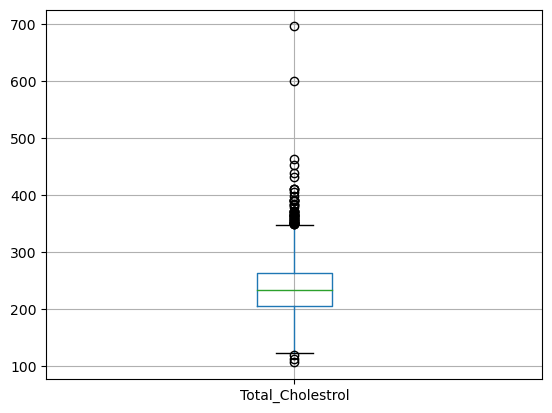

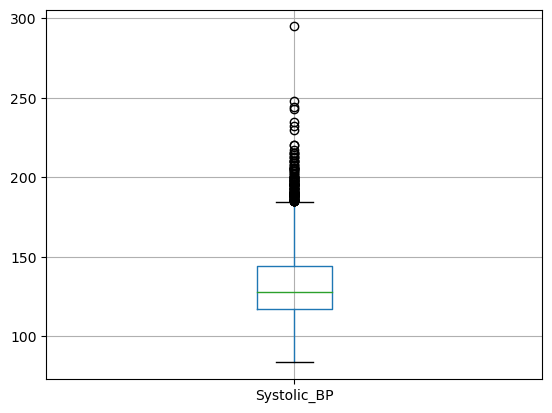

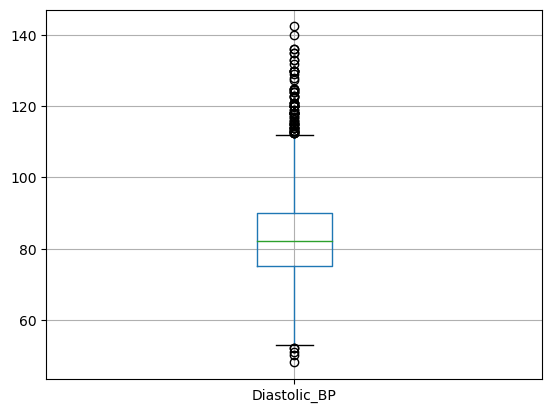

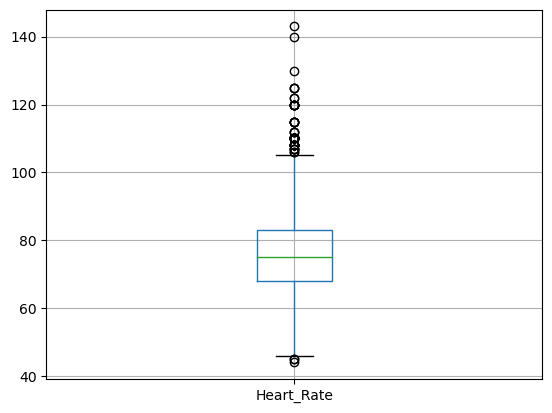

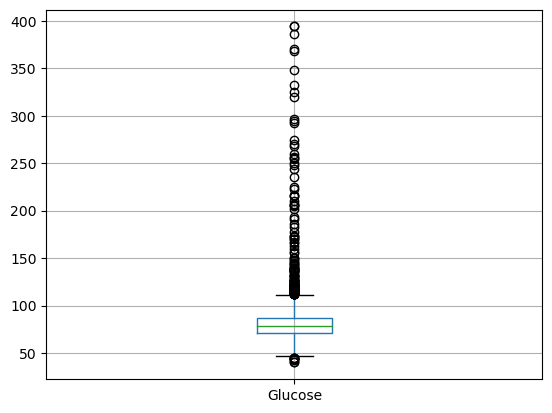

In [9]:
# Create a boxplot
df.boxplot(column = 'BMI')
plt.show()
df.boxplot(column = 'Cigarettes_Per_Day')
plt.show()
df.boxplot(column = 'Total_Cholestrol')
plt.show()
df.boxplot(column = 'Systolic_BP')
plt.show()
df.boxplot(column = 'Diastolic_BP')
plt.show()
df.boxplot(column = 'Heart_Rate')
plt.show()
df.boxplot(column = 'Glucose')

plt.show()

---
# DATA CLEANING STEP 3:HANDLING OUTLIERS

In this section, we will be handling the outliers we detected in the columns Glucose, Systolic_BP and Total_Cholestrol by setting a threshold value and removing the extremes.

In [10]:
# Define a threshold for extreme outliers for required columns and replace it with median or mean values

#for Glucose
threshold = 300
mean_value = df['Glucose'].mean()
df['Glucose'] = np.where(df['Glucose'] > threshold, mean_value, df['Glucose'])

#for Systolic_BP
threshold = 250
mean_value = df['Systolic_BP'].mean()
df['Systolic_BP'] = np.where(df['Systolic_BP'] > threshold, mean_value, df['Systolic_BP'])


#for Total_Cholestrol
threshold = 500
median_value = df['Total_Cholestrol'].median()
df['Total_Cholestrol'] = np.where(df['Total_Cholestrol'] > threshold, median_value, df['Total_Cholestrol'])

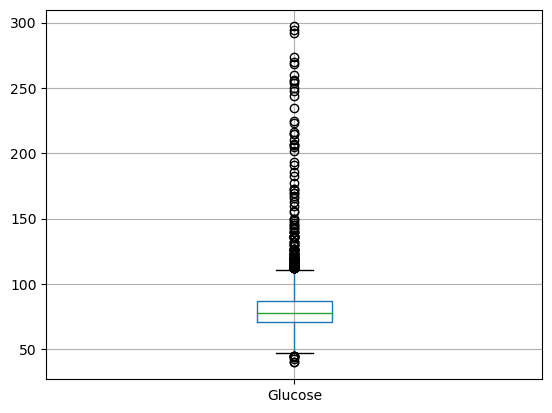

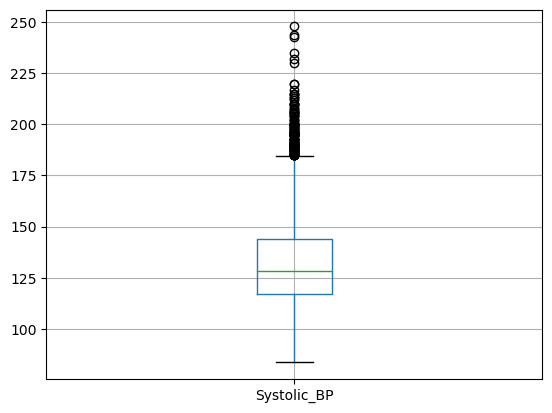

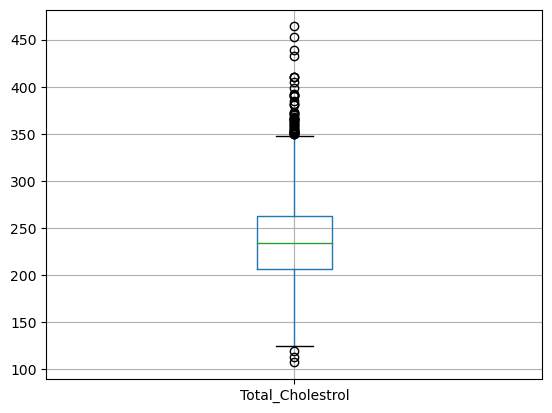

In [11]:
#visualizing the updated Box-plots

df.boxplot(column = 'Glucose')
plt.show()

df.boxplot(column = 'Systolic_BP')
plt.show()

df.boxplot(column = 'Total_Cholestrol')
plt.show()

### Count the number of NA values in the dataframe for each column.

In [12]:
#Checking for null values in the dataframe
df.isna().sum()

Gender                          0
Age                             0
Education_Level               105
Is_Smoker                       0
Cigarettes_Per_Day             29
Systolic_BP                     0
Diastolic_BP                    0
Has_BP_Meds                    53
Has_Prevalent_Hypertension      0
Glucose                       388
Has_Diabetes                    0
BMI                            19
Heart_Rate                      1
Total_Cholestrol               50
Has_Prevalent_Stroke            0
Heart_Stroke                    0
dtype: int64

# DATA CLEANING STEP 4: HANDLING MISSING VALUES FOR _NUMERIC_ DATA

After finding the number of missing values we will be dealing with numeric data columns and finding the possible values rather than deleting the values.

In [13]:
# After finding the number of missing values we will be dealing with numeric data columns and finding the possible values

#Using the median can be more robust to outliers, which might be influencing the skewness
df['Cigarettes_Per_Day'].fillna(df['Cigarettes_Per_Day'].median(), inplace=True)
df['Total_Cholestrol'].fillna(df['Total_Cholestrol'].median(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['Heart_Rate'].fillna(df['Heart_Rate'].median(), inplace=True)


#suggesting a heavily skewed distribution with a long tail of higher values
#Since extreme values might be contributing to the high skewness, we can consider trimming the extreme values
#(e.g., top 1% or 5%) and then filling the NA rows with the mean of the trimmed values.

trimmed_values = df['Glucose'].quantile(q=0.99)
df['Glucose'] = df['Glucose'].clip(upper=trimmed_values)

# Fill NA rows with the mean of the trimmed values
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)



# DATA CLEANING STEP 5: HANDLING MISSING VALUES FOR _CATEGORICAL_ DATA

For dealing with categorical data that contains NA values, we will be using the mode for BPMeds and education, both of which are categorical variables.


In [14]:
# for dealing with the BPMeds and education which is categorical in nature, we will be using mode
df['Has_BP_Meds'].fillna(df['Has_BP_Meds'].mode()[0], inplace=True)
df['Education_Level'].fillna(df['Education_Level'].mode()[0], inplace=True)

### Checks for leading and trailing whitespaces in the dataset

In [15]:
#  Checking  whitespaces from dataframe

# Check leading whitespaces
leading_whitespace = df.apply(lambda x: x.astype(str).str.startswith(' ').any())

# Check trailing whitespaces
trailing_whitespace = df.apply(lambda x: x.astype(str).str.endswith(' ').any())

# Print results
print("Columns with leading whitespaces:")
print(leading_whitespace[leading_whitespace].index.tolist())

print("\nColumns with trailing whitespaces:")
print(trailing_whitespace[trailing_whitespace].index.tolist())


Columns with leading whitespaces:
[]

Columns with trailing whitespaces:
[]


# DATA CLEANING STEP 6 : CATEGORIZING CONTINUOUS DATA INTO BINS
We categorize continuous numerical values into predefined ranges or bins, a process known as binning. It simplifies data analysis, uncovers trends, mitigates outliers, and simplifies data representation. Binning helps to prepare important categorical variables for modeling and analysis.

In [16]:
# Define bin edges and labels for BMI categories
bin_edges = [0, 18.5, 24.9, 29.9, 100]  # BMI categories: Underweight, Normal weight, Overweight, Obesity
bin_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity']

# Create a new column with BMI categories
df['BMI_Category'] = pd.cut(df['BMI'], bins=bin_edges, labels=bin_labels, right=False)

# Display the DataFrame with the 'BMI' and 'BMI_Category' columns
print(df[['BMI', 'BMI_Category']])

# Rearranging Columns of DataFrame 
df = df.reindex(columns=['Gender', 'Age', 'Education_Level' ,'Is_Smoker','Cigarettes_Per_Day','Systolic_BP',
                         'Diastolic_BP', 'Has_BP_Meds', 'Has_Prevalent_Hypertension'  , 'Glucose' ,
                         'Has_Diabetes' , 'BMI', 'BMI_Category' , 'Heart_Rate', 'Total_Cholestrol' ,
                         'Has_Prevalent_Stroke' , 'Heart_Stroke' ])

        BMI   BMI_Category
0     26.97     Overweight
1     28.73     Overweight
2     25.34     Overweight
3     28.58     Overweight
4     23.10  Normal weight
...     ...            ...
4233  25.97     Overweight
4234  19.71  Normal weight
4235  22.00  Normal weight
4236  19.16  Normal weight
4237  21.47  Normal weight

[4238 rows x 2 columns]


In [17]:
# After dealing with all the missing values, 
# we are now performing validation to ensure that there are no more missing values in the data.

df.isna().sum()

Gender                        0
Age                           0
Education_Level               0
Is_Smoker                     0
Cigarettes_Per_Day            0
Systolic_BP                   0
Diastolic_BP                  0
Has_BP_Meds                   0
Has_Prevalent_Hypertension    0
Glucose                       0
Has_Diabetes                  0
BMI                           0
BMI_Category                  0
Heart_Rate                    0
Total_Cholestrol              0
Has_Prevalent_Stroke          0
Heart_Stroke                  0
dtype: int64

# DATA CLEANING STEP 7: IDENTIFYING DISTINCT VALUES FOR FEATURE ENCODING

In this step, we explore and identify distinct values in the dataset. This helps determine the encoding strategy for categorical features, which involves converting them into a numerical format for machine learning algorithms.


In [18]:
# finding the distinct values in the dataset , so according to which we can choose the encoder and perform encoding on the features
distinct_values_Gender = df['Gender'].unique()
print("Distinct values in Gender", distinct_values_Gender)

distinct_values_Education_Level = df['Education_Level'].unique()
print("Distinct values in Education_Level", distinct_values_Education_Level)

distinct_values_Heart_Stroke = df['Heart_Stroke'].unique()
print("Distinct values in Heart_Stroke", distinct_values_Heart_Stroke)

distinct_values_Has_Prevalent_Stroke = df['Has_Prevalent_Stroke'].unique()
print("Distinct values in Has_Prevalent_Stroke", distinct_values_Has_Prevalent_Stroke)


columns_to_encode = ['Gender', 'Education_Level' , 'Heart_Stroke' , 'Has_Prevalent_Stroke' , 'BMI_Category' ]


# Initialize LabelEncoder
encoder = LabelEncoder()

# Iterate through each column and encode
for col in columns_to_encode:
    df[col] = encoder.fit_transform(df[col])

Distinct values in Gender ['Male' 'Female']
Distinct values in Education_Level ['postgraduate' 'primaryschool' 'uneducated' 'graduate']
Distinct values in Heart_Stroke ['No' 'yes']
Distinct values in Has_Prevalent_Stroke ['no' 'yes']


# DATA CLEANING STEP 8: ADJUSTING DATA TYPES OF COLUMNS

We refine column data types to ensure efficient memory usage, accurate analysis, and compatibility with ML algorithms.


### Identifying Mismatches:
Check columns for appropriate data types. For example, _Cigarettes_Per_Day_ cannot have float values as you cannot smoke a decimal number of cigarettes. Assigning a float data type to a boolean column like _Has_BP_Meds_ is also incorrect.



In [19]:
df.dtypes

Gender                          int64
Age                             int64
Education_Level                 int64
Is_Smoker                       int64
Cigarettes_Per_Day            float64
Systolic_BP                   float64
Diastolic_BP                  float64
Has_BP_Meds                   float64
Has_Prevalent_Hypertension      int64
Glucose                       float64
Has_Diabetes                    int64
BMI                           float64
BMI_Category                    int64
Heart_Rate                    float64
Total_Cholestrol              float64
Has_Prevalent_Stroke            int64
Heart_Stroke                    int64
dtype: object

In [20]:
# Changing Data Type of Columns
df['Cigarettes_Per_Day'] = df['Cigarettes_Per_Day'].astype(int)
df['Has_BP_Meds'] = df['Has_BP_Meds'].astype(int)
df['Total_Cholestrol'] = df['Total_Cholestrol'].astype(int)
df['Heart_Rate'] = df['Heart_Rate'].astype(int)
df['Glucose'] = df['Glucose'].astype(int)
df['Gender'] = df['Gender'].astype(int)
df['Education_Level'] = df['Education_Level'].astype(int)
df['Heart_Stroke'] = df['Heart_Stroke'].astype(int)
df['Has_Prevalent_Stroke'] = df['Heart_Stroke'].astype(int)

df.dtypes

Gender                          int64
Age                             int64
Education_Level                 int64
Is_Smoker                       int64
Cigarettes_Per_Day              int64
Systolic_BP                   float64
Diastolic_BP                  float64
Has_BP_Meds                     int64
Has_Prevalent_Hypertension      int64
Glucose                         int64
Has_Diabetes                    int64
BMI                           float64
BMI_Category                    int64
Heart_Rate                      int64
Total_Cholestrol                int64
Has_Prevalent_Stroke            int64
Heart_Stroke                    int64
dtype: object

# DATA CLEANING Step 9: Modifying Precision of Float Values

Our aim is to refine the precision of floating-point values in the dataset to ensure accurate numerical representations. We'll keep 'Systolic_BP', 'Diastolic_BP', and 'BMI' columns with a precision of 2 to avoid inconsistencies in float values.

In [21]:
# Changing the precision of the float columns
columns_to_round = ['Systolic_BP', 'Diastolic_BP', 'BMI']
df[columns_to_round] = df[columns_to_round].round(2)

---
---
# Exploratory Data Analysis (EDA)


## EDA 2 - CHECKING SKEWNESS OF FEATURES
A skewness value of zero indicates a symmetrical distribution, with data evenly spread around the mean. This helps analysts make informed decisions about data preprocessing, modeling, and interpretation.

In [22]:
# Checking skewness of data
# postive : Also known as right skew or right-tail skew
# Negtive : Also known as left skew or left-tail skew.
# Zero : Indicates a symmetric distribution

skewness = df.skew()
print(skewness)

Gender                        0.286135
Age                           0.228146
Education_Level              -0.738641
Is_Smoker                     0.023606
Cigarettes_Per_Day            1.257472
Systolic_BP                   1.076292
Diastolic_BP                  0.714102
Has_BP_Meds                   5.588351
Has_Prevalent_Hypertension    0.819278
Glucose                       1.975582
Has_Diabetes                  5.994378
BMI                           0.985442
BMI_Category                  0.053554
Heart_Rate                    0.644608
Total_Cholestrol              0.531201
Has_Prevalent_Stroke          1.939741
Heart_Stroke                  1.939741
dtype: float64


## EDA 3 : DataFrame Shape

The shape of the DataFrame is given by the number of rows and columns. We can retrieve this information using the `shape` attribute of the DataFrame.


In [23]:
df.shape

(4238, 17)

## EDA 4 : DataFrame Summary Statistics

In this section, we present the summary statistics for the DataFrame. These statistics offer valuable insights into the central tendency, dispersion, and distribution of numerical columns. 

In [24]:
summary_stats = df.describe().transpose()
summary_stats

,count,mean,std,min,25%,50%,75%,max
Gender,4238.0,0.429212,0.495022,0.00,0.00,0.0,1.0000,1.0
Age,4238.0,49.584946,8.572160,32.00,42.00,49.0,56.0000,70.0
Education_Level,4238.0,1.994809,1.091288,0.00,1.00,2.0,3.0000,3.0
Is_Smoker,4238.0,0.494101,0.500024,0.00,0.00,0.0,1.0000,1.0
Cigarettes_Per_Day,4238.0,8.941482,11.902399,0.00,0.00,0.0,20.0000,70.0
Systolic_BP,4238.0,132.314028,21.895950,83.50,117.00,128.0,144.0000,248.0
Diastolic_BP,4238.0,82.893464,11.910850,48.00,75.00,82.0,89.8750,142.5
Has_BP_Meds,4238.0,0.029259,0.168552,0.00,0.00,0.0,0.0000,1.0
Has_Prevalent_Hypertension,4238.0,0.310524,0.462763,0.00,0.00,0.0,1.0000,1.0
Glucose,4238.0,80.650071,14.987211,40.00,72.00,80.0,85.0000,158.0


# EDA 5 : Generating Histograms for Each Feature

In this step, we aim to create histograms for each feature in the dataset. Histograms offer a visual representation of the distribution of numerical data, allowing us to observe patterns, identify outliers, and understand the spread of values across different features.

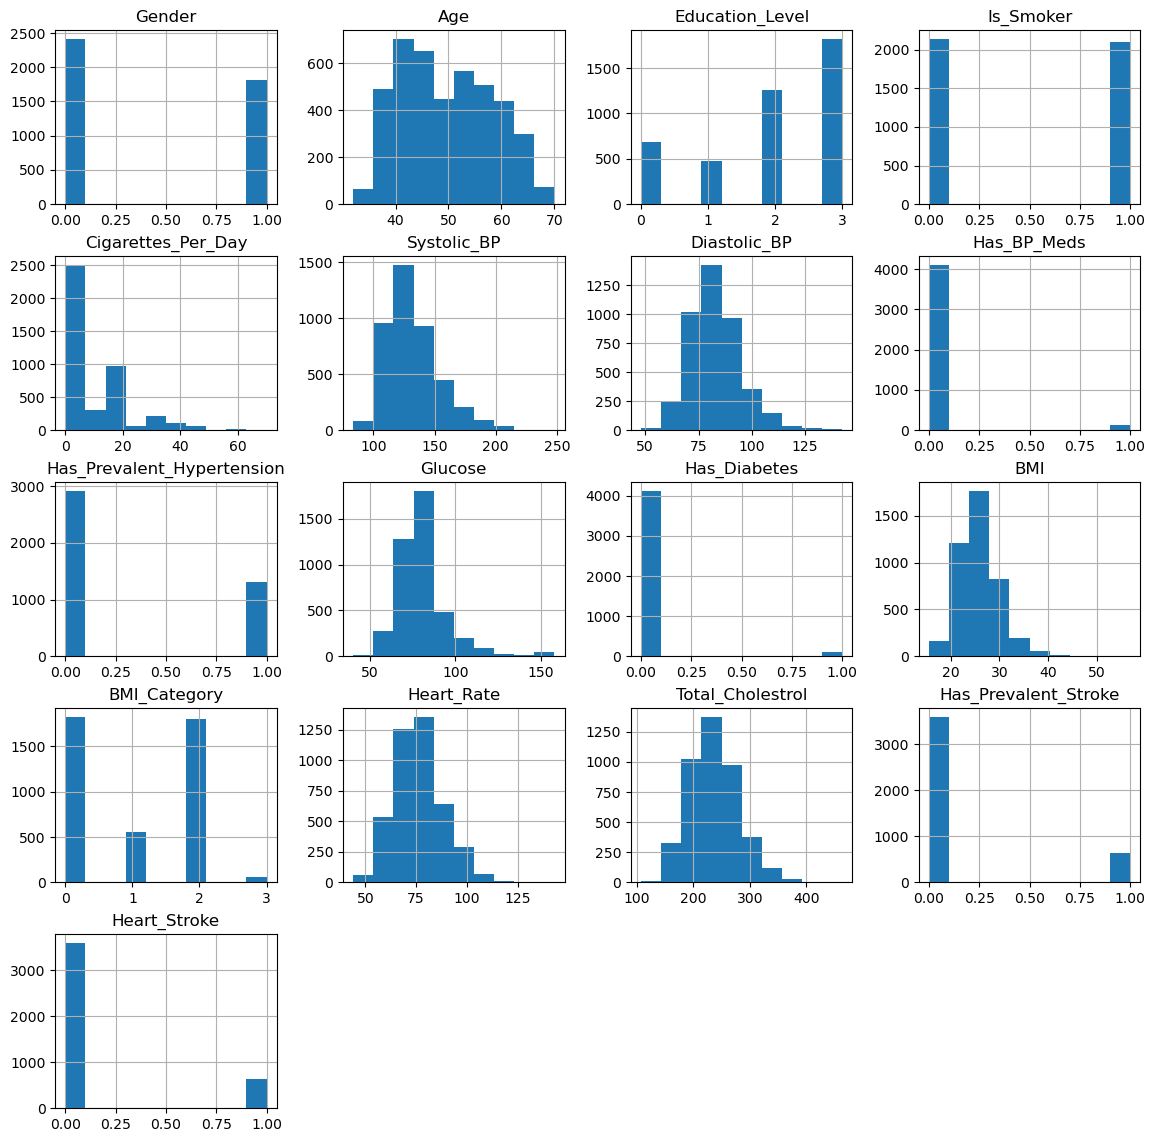

In [25]:
df.hist(figsize = (14,14))
plt.show()

# EDA 6: Exploring Feature Correlation with Heatmap

In this step, we delve into understanding the correlation between different features in the dataset. A heatmap is an effective visualization tool to showcase the correlation matrix, offering insights into relationships between variables.

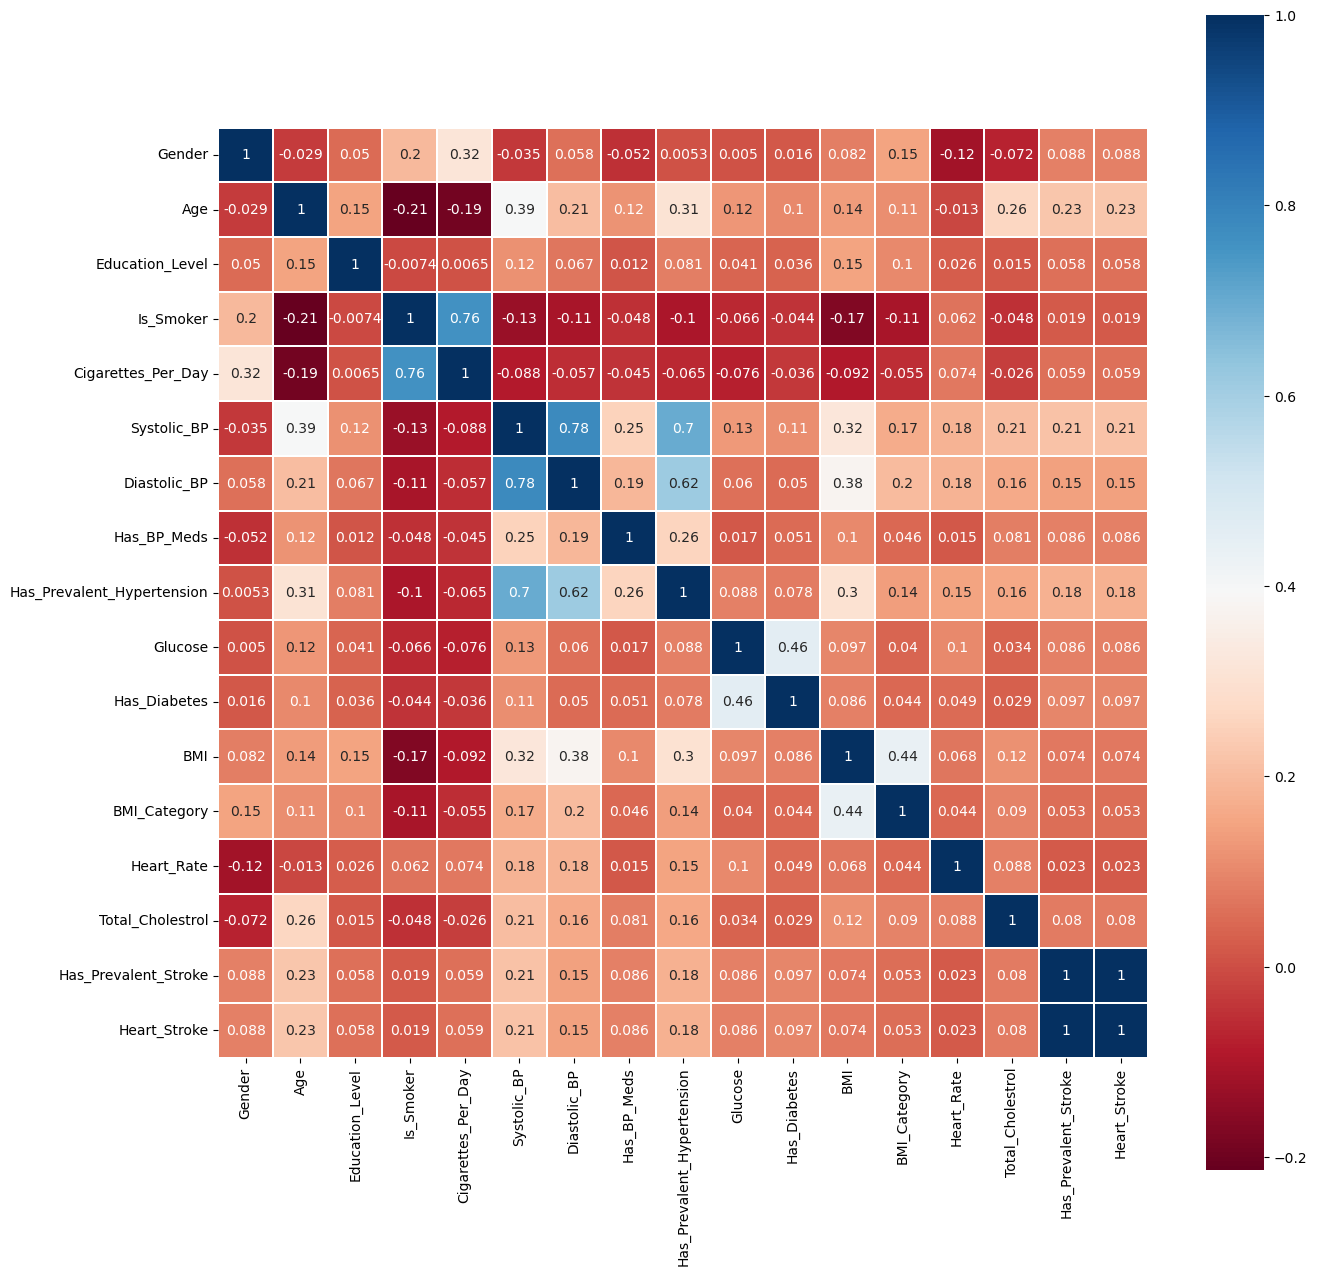

In [26]:
# Checking the correlation between the features using heatmap 
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(),square=True, cmap = 'RdBu', linecolor='white', annot=True , linewidths=0.1,vmax=1.0)
plt.show()

# EDA 7: Calculating Standard Deviation, Mode and Median

In this step, we compute the Standard Deviation , Mode and Median for each feature in the dataset. Mode represents the most frequently occurring value, while the median represents the middle value in a sorted dataset.

In [27]:
#  calculating Standard Deviation , Mode and Median of the data

print('Standard Deviation of all features')
print(df.std())
print('\n')
print('Median of all features')
print(df.median())
print('\n')
df.mode()

Standard Deviation of all features
Gender                         0.495022
Age                            8.572160
Education_Level                1.091288
Is_Smoker                      0.500024
Cigarettes_Per_Day            11.902399
Systolic_BP                   21.895950
Diastolic_BP                  11.910850
Has_BP_Meds                    0.168552
Has_Prevalent_Hypertension     0.462763
Glucose                       14.987211
Has_Diabetes                   0.158316
BMI                            4.071041
BMI_Category                   0.953774
Heart_Rate                    12.025185
Total_Cholestrol              43.404398
Has_Prevalent_Stroke           0.359023
Heart_Stroke                   0.359023
dtype: float64


Median of all features
Gender                          0.0
Age                            49.0
Education_Level                 2.0
Is_Smoker                       0.0
Cigarettes_Per_Day              0.0
Systolic_BP                   128.0
Diastolic_BP                 

,Gender,Age,Education_Level,Is_Smoker,Cigarettes_Per_Day,Systolic_BP,Diastolic_BP,Has_BP_Meds,Has_Prevalent_Hypertension,Glucose,Has_Diabetes,BMI,BMI_Category,Heart_Rate,Total_Cholestrol,Has_Prevalent_Stroke,Heart_Stroke
0,0,40,3,0,0,120.0,80.0,0,0,80,0,25.4,0,75,234,0,0


## FEATURE ENGINEERING 

We explore the relationship between two columns in the dataset, focusing on the scenario where one column significantly impacts the other. This analysis is essential for understanding how changes in one variable correspond to variations in another.

In the below code snippet, Column Is_Smoker and Cigarettes_Per_Day illustrates strong correlation.  

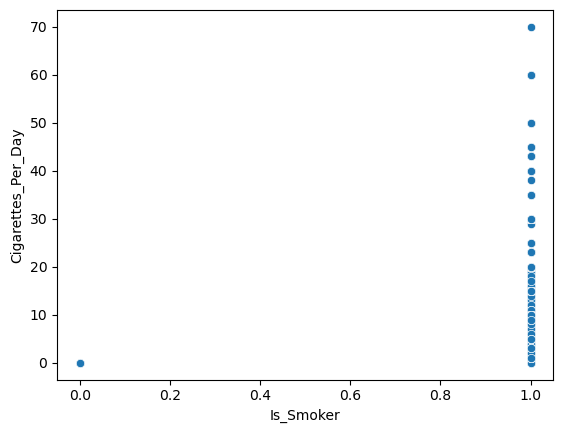

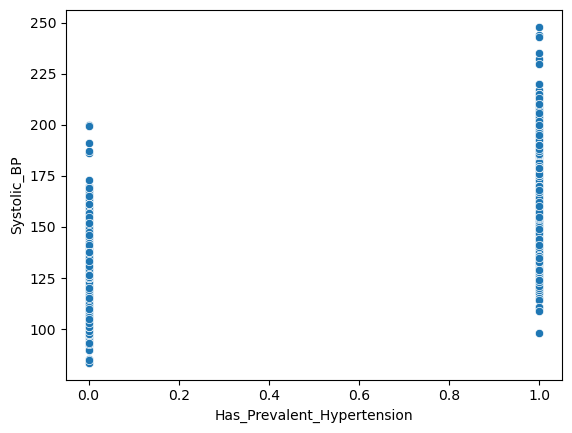

In [28]:
sns.scatterplot(x='Is_Smoker', y='Cigarettes_Per_Day', data=df)
plt.show()

sns.scatterplot(x='Has_Prevalent_Hypertension', y='Systolic_BP', data=df)
plt.show()

# EDA 8 Weak Correlation Column Analysis [Education_Level]

In analyzing the correlation of the 'Education_Level' column with other features, we observe the following:



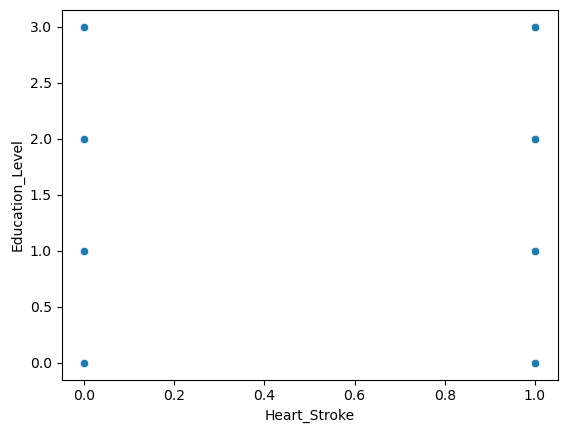

Correlation with 'Education_Level' for each column:
Gender                        0.050436
Age                           0.151097
Education_Level               1.000000
Is_Smoker                    -0.007409
Cigarettes_Per_Day            0.006482
Systolic_BP                   0.117305
Diastolic_BP                  0.067395
Has_BP_Meds                   0.012374
Has_Prevalent_Hypertension    0.081240
Glucose                       0.040669
Has_Diabetes                  0.036291
BMI                           0.146720
BMI_Category                  0.100778
Heart_Rate                    0.026066
Total_Cholestrol              0.015311
Has_Prevalent_Stroke          0.058036
Heart_Stroke                  0.058036
Name: Education_Level, dtype: float64


In [29]:

sns.scatterplot(x='Heart_Stroke', y='Education_Level', data=df)
plt.show()

# Calculate the Education_Level correlation with all other columns
education_level_correlations = df.corr()['Education_Level']

# Display the  Education_Level correlations
print("Correlation with 'Education_Level'", "for each column:")
print(education_level_correlations)


### Weak Correlations: Features with correlation coefficients close to zero suggest a limited association with 'Education_Level.'
- Gender: 0.0504
- Is_Smoker: -0.0074
- Cigarettes_Per_Day: 0.0065
- Has_BP_Meds: 0.0124
- Has_Prevalent_Hypertension: 0.0812
- Glucose: 0.0359
- Has_Diabetes: 0.0363
- Heart_Rate: 0.0261
- Total_Cholestrol: 0.0173
- Has_Prevalent_Stroke: 0.0580
- Heart_Stroke:0.0580

Since, the feature does not provide any significant input on the target or any other features. It can be removed from the dataframe.

# __[LATE DATA CLEANING] STEP 10__: DROP COLUMN EDUCATION_LEVEL AFTER FEATURE ANALYSIS

In [30]:
df = df.drop(columns= ['Education_Level']) 
df

,Gender,Age,Is_Smoker,Cigarettes_Per_Day,Systolic_BP,Diastolic_BP,Has_BP_Meds,Has_Prevalent_Hypertension,Glucose,Has_Diabetes,BMI,BMI_Category,Heart_Rate,Total_Cholestrol,Has_Prevalent_Stroke,Heart_Stroke
0,1,39,0,0,106.0,70.0,0,0,77,0,26.97,2,80,195,0,0
1,0,46,0,0,121.0,81.0,0,0,76,0,28.73,2,95,250,0,0
2,1,48,1,20,127.5,80.0,0,0,70,0,25.34,2,75,245,0,0
3,0,61,1,30,150.0,95.0,0,1,103,0,28.58,2,65,225,1,1
4,0,46,1,23,130.0,84.0,0,0,85,0,23.10,0,85,285,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1,179.0,92.0,0,1,86,0,25.97,2,66,313,1,1
4234,1,51,1,43,126.5,80.0,0,0,68,0,19.71,0,65,207,0,0
4235,0,48,1,20,131.0,72.0,0,0,86,0,22.00,0,84,248,0,0
4236,0,44,1,15,126.5,87.0,0,0,80,0,19.16,0,86,210,0,0


# EDA 8 : PIE CHART

### PIE CHART FOR BMI Categories

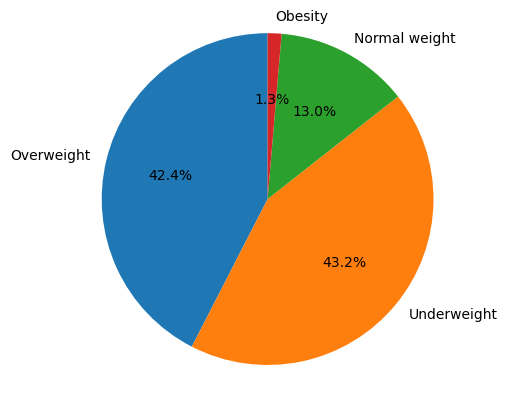

In [31]:
data = df['BMI_Category']

# Count the occurrences of each unique string
data_counts = Counter(data)
# Map original labels to custom labels
custom_labels = {0: 'Underweight', 1: 'Normal weight',2:'Overweight',3:'Obesity'}

# Get labels and sizes for the pie chart
sizes = list(data_counts.values())
labels = list(data_counts.keys())

# Replace original labels with custom labels
labels = [custom_labels.get(label, label) for label in labels]

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Draw a circle at the center to make it look like a pie
centre_circle = plt.Circle((0, 0), 0.0, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the pie chart
plt.show()

### Gender PIE CHART

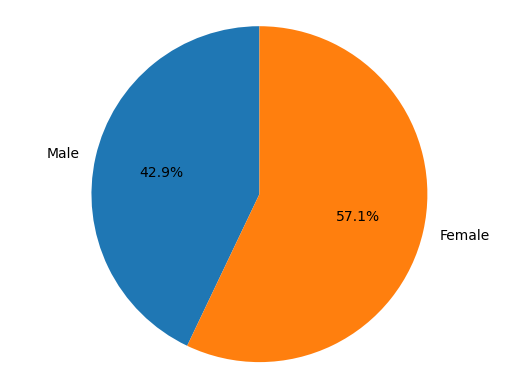

In [32]:
data = df['Gender']
custom_labels = {0: 'Female', 1: 'Male'}

# Count the occurrences of each unique string
data_counts = Counter(data)

# Get labels and sizes for the pie chart
labels = list(data_counts.keys())
sizes = list(data_counts.values())

# Replace original labels with custom labels
labels = [custom_labels.get(label, label) for label in labels]
# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Draw a circle at the center to make it look like a pie
centre_circle = plt.Circle((0, 0), 0.0, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the pie chart
plt.show()

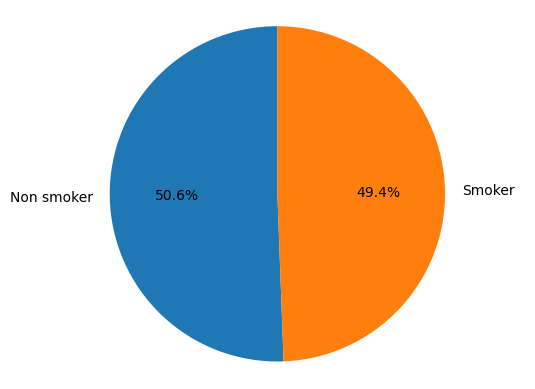

In [33]:
data = df['Is_Smoker']

custom_labels = {0: 'Non smoker', 1: 'Smoker'}

# Count the occurrences of each unique string
data_counts = Counter(data)

# Get labels and sizes for the pie chart
labels = list(data_counts.keys())
sizes = list(data_counts.values())

labels = [custom_labels.get(label, label) for label in labels]


# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Draw a circle at the center to make it look like a pie
centre_circle = plt.Circle((0, 0), 0.0, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the pie chart
plt.show()

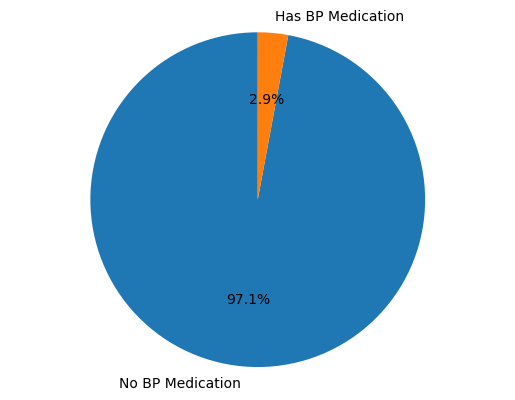

In [34]:
data = df['Has_BP_Meds']
custom_labels = {0: 'No BP Medication', 1: 'Has BP Medication'}

# Count the occurrences of each unique string
data_counts = Counter(data)

# Get labels and sizes for the pie chart
labels = list(data_counts.keys())
sizes = list(data_counts.values())

labels = [custom_labels.get(label, label) for label in labels]

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Draw a circle at the center to make it look like a pie
centre_circle = plt.Circle((0, 0), 0.0, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the pie chart
plt.show()

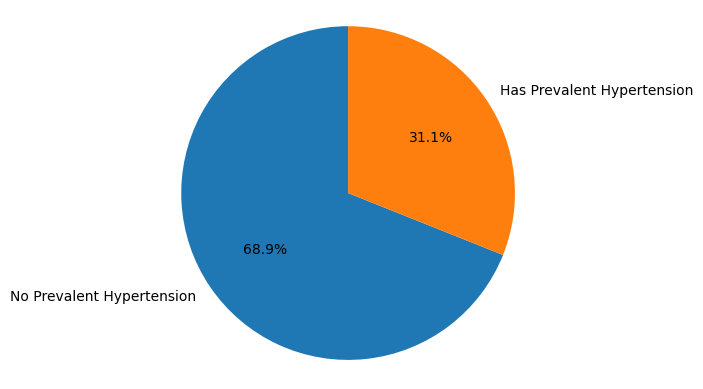

In [35]:
data = df['Has_Prevalent_Hypertension']
custom_labels = {0: 'No Prevalent Hypertension', 1: 'Has Prevalent Hypertension'}

# Count the occurrences of each unique string
data_counts = Counter(data)

# Get labels and sizes for the pie chart
labels = list(data_counts.keys())
sizes = list(data_counts.values())

labels = [custom_labels.get(label, label) for label in labels]


# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Draw a circle at the center to make it look like a pie
centre_circle = plt.Circle((0, 0), 0.0, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the pie chart
plt.show()

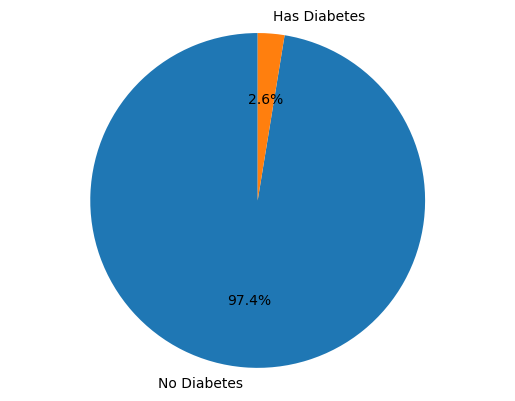

In [36]:
data = df['Has_Diabetes']
custom_labels = {0: 'No Diabetes', 1: 'Has Diabetes'}

# Count the occurrences of each unique string
data_counts = Counter(data)

# Get labels and sizes for the pie chart
labels = list(data_counts.keys())
sizes = list(data_counts.values())

labels = [custom_labels.get(label, label) for label in labels]


# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Draw a circle at the center to make it look like a pie
centre_circle = plt.Circle((0, 0), 0.0, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the pie chart
plt.show()

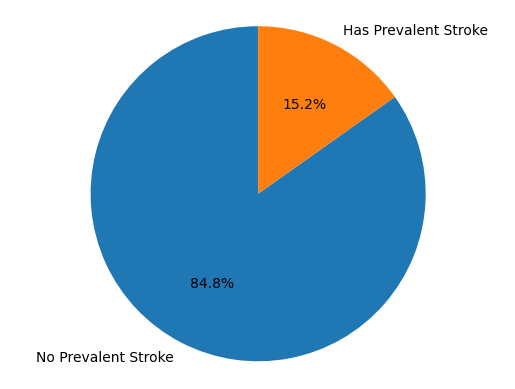

In [37]:
data = df['Has_Prevalent_Stroke']
custom_labels = {0: 'No Prevalent Stroke', 1: 'Has Prevalent Stroke'}

# Count the occurrences of each unique string
data_counts = Counter(data)

# Get labels and sizes for the pie chart
labels = list(data_counts.keys())
sizes = list(data_counts.values())

labels = [custom_labels.get(label, label) for label in labels]


# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Draw a circle at the center to make it look like a pie
centre_circle = plt.Circle((0, 0), 0.0, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the pie chart
plt.show()

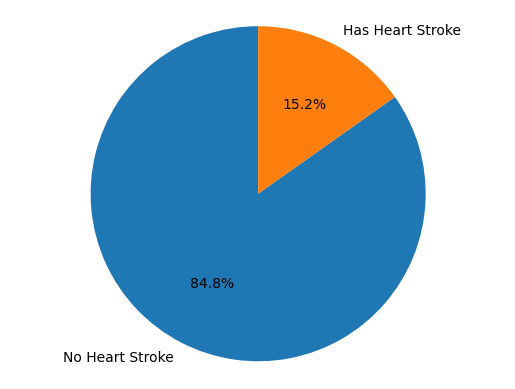

In [38]:
data = df['Heart_Stroke']
custom_labels = {0: 'No Heart Stroke', 1: 'Has Heart Stroke'}


# Count the occurrences of each unique string
data_counts = Counter(data)

# Get labels and sizes for the pie chart
labels = list(data_counts.keys())
sizes = list(data_counts.values())

labels = [custom_labels.get(label, label) for label in labels]


# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Draw a circle at the center to make it look like a pie
centre_circle = plt.Circle((0, 0), 0.0, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the pie chart
plt.show()

# EDA 9:  Violin Plot

## Violin Plot for BMI Categories

In this section, we will plot violin plots for our numeric and catgegorial values.  In violin plota the width of the violin depicts how dense the data points are in that density. We can also see a line inside the violin, this line represnts the median of the numeric values

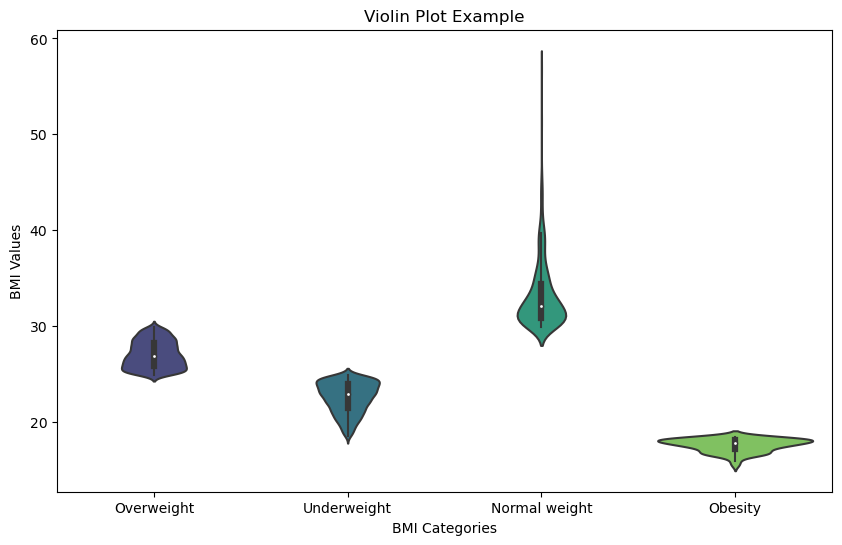

In [39]:
plt.figure(figsize=(10, 6))
BMI_Cat_String = df['BMI_Category'].replace({0: 'Underweight', 1: 'Normal weight',2:'Overweight',3:'Obesity'})
sns.violinplot(x=BMI_Cat_String, y=df['BMI'], data=df, palette='viridis')
plt.title('Violin Plot Example')
plt.xlabel('BMI Categories')
plt.ylabel('BMI Values')
plt.show()

## Violin Plot for Heart_Stroke

In [40]:
plt.figure(figsize=(30, 4))
sns.violinplot(x=df['Has_Diabetes'], y=df['Glucose'], data=df, palette='viridis')
plt.title('Violin Plot Example')
plt.xlabel('Has_Diabetes')
plt.ylabel('Glucose Level')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

# EDA 10: PAIR PLOT

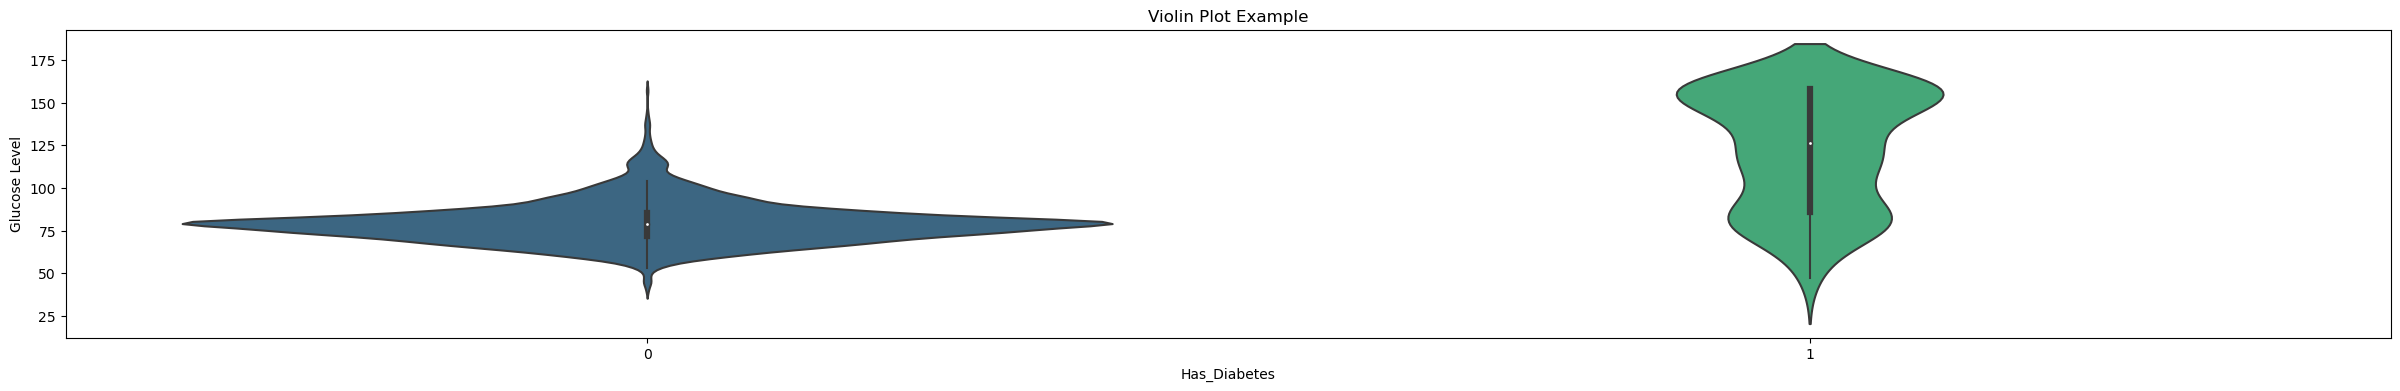

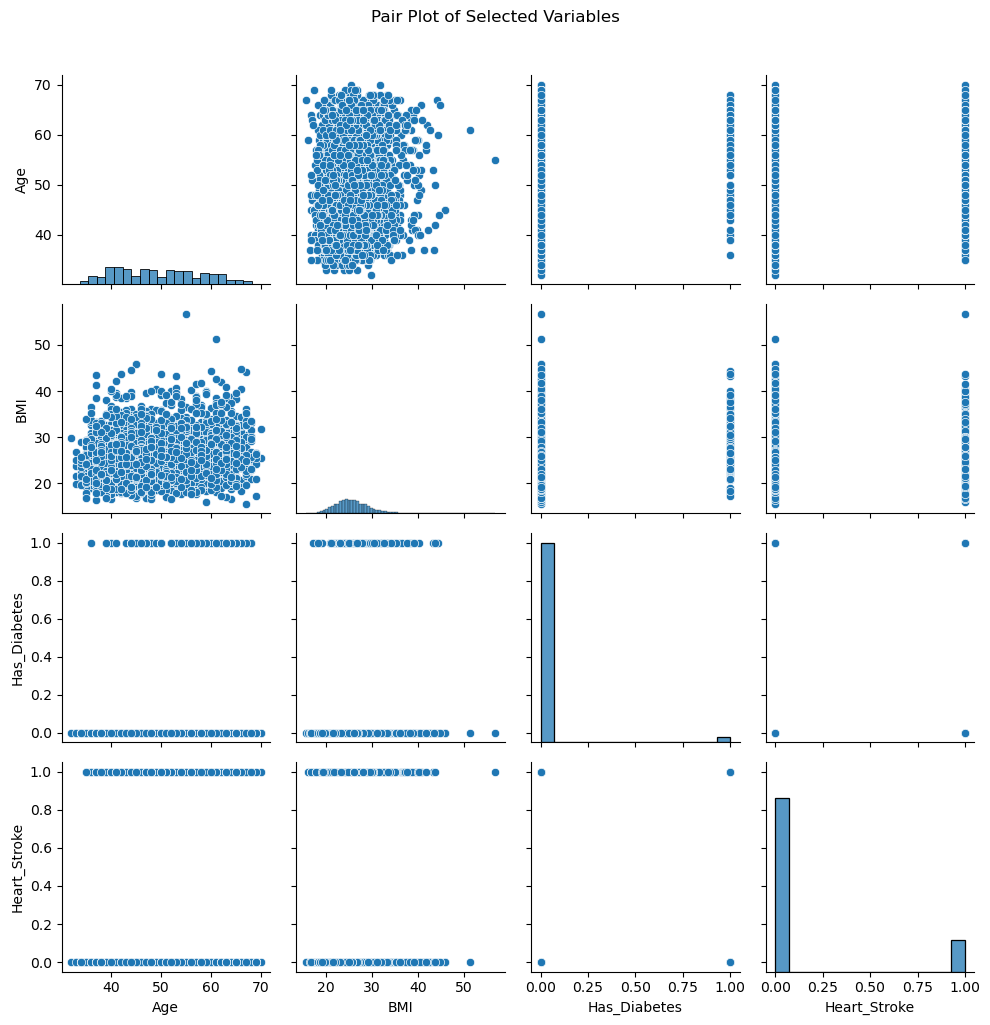

In [41]:
selected_columns = ['Age', 'BMI', 'Has_Diabetes', 'Heart_Stroke']

# Create a pair plot
sns.pairplot(df[selected_columns])
plt.suptitle('Pair Plot of Selected Variables', y=1.02)
plt.tight_layout() 
plt.show()

# EDA 11 - CATEGORICAL BOX PLOT

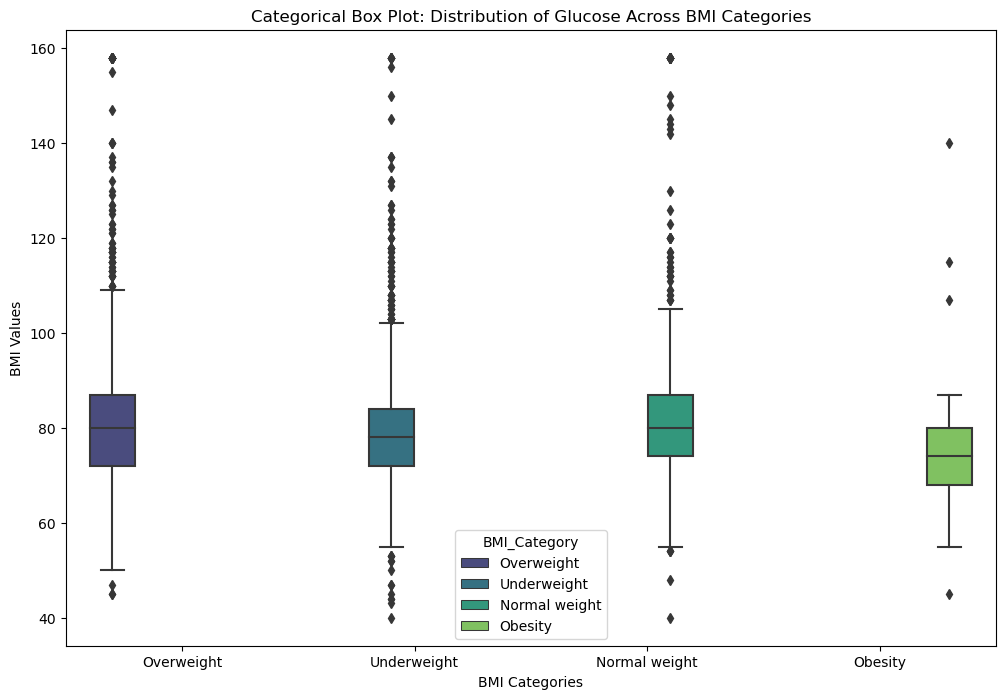

In [42]:
# Categorical Box Plot with respect to 'Has_Diabetes'
plt.figure(figsize=(12, 8))
BMI_Cat_String = df['BMI_Category'].replace({0: 'Underweight', 1: 'Normal weight',2:'Overweight',3:'Obesity'})
#custom_labels = {0: 'Underweight', 1: 'Normal weight',2:'Overweight',3:'Obesity'}
sns.boxplot(x=BMI_Cat_String, y=df['Glucose'], hue=BMI_Cat_String, palette='viridis')
plt.title('Categorical Box Plot: Distribution of Glucose Across BMI Categories')
plt.xlabel('BMI Categories')
plt.ylabel('BMI Values')
plt.show()

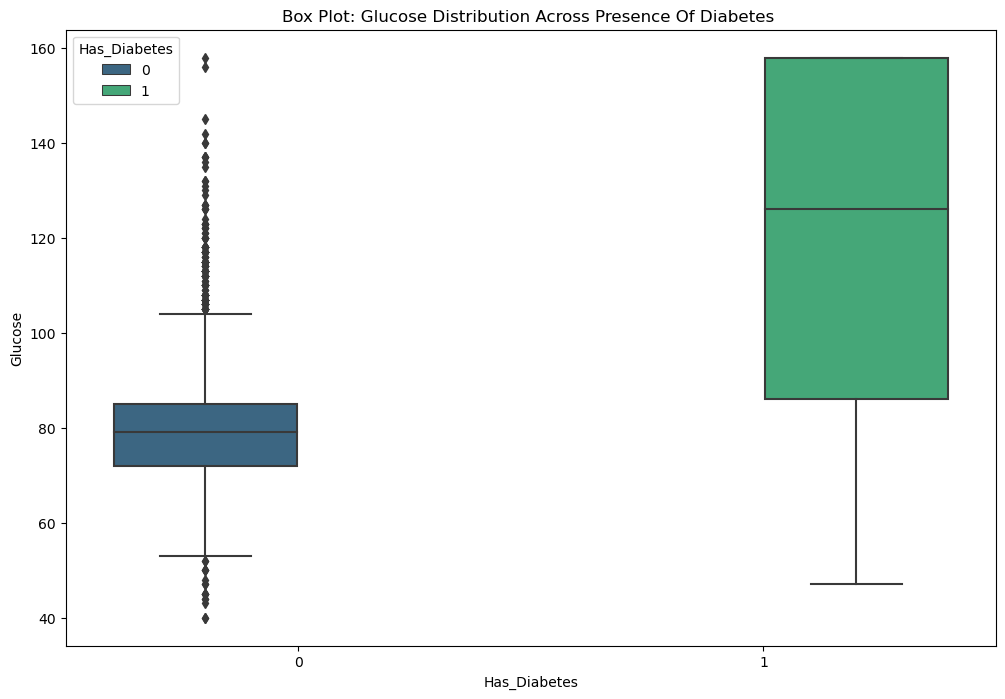

In [43]:
# Categorical Box Plot: Distribution of Glucose Across Presenece Of Diabetes 
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['Has_Diabetes'], y=df['Glucose'], hue=df['Has_Diabetes'], palette='viridis')
plt.title('Box Plot: Glucose Distribution Across Presence Of Diabetes ')
plt.show()


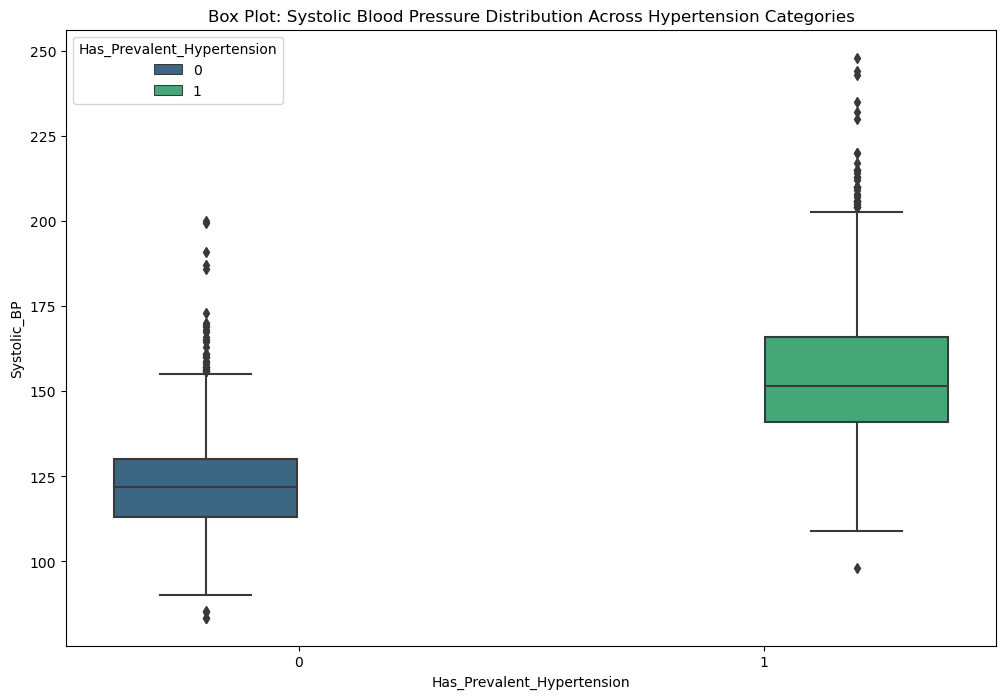

In [44]:
# Categorical Box Plot: Distribution of Systolic Blood Pressure Across Hypertension Categories
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['Has_Prevalent_Hypertension'], y=df['Systolic_BP'], hue=df['Has_Prevalent_Hypertension'], palette='viridis')
plt.title('Box Plot: Systolic Blood Pressure Distribution Across Hypertension Categories')
plt.show()


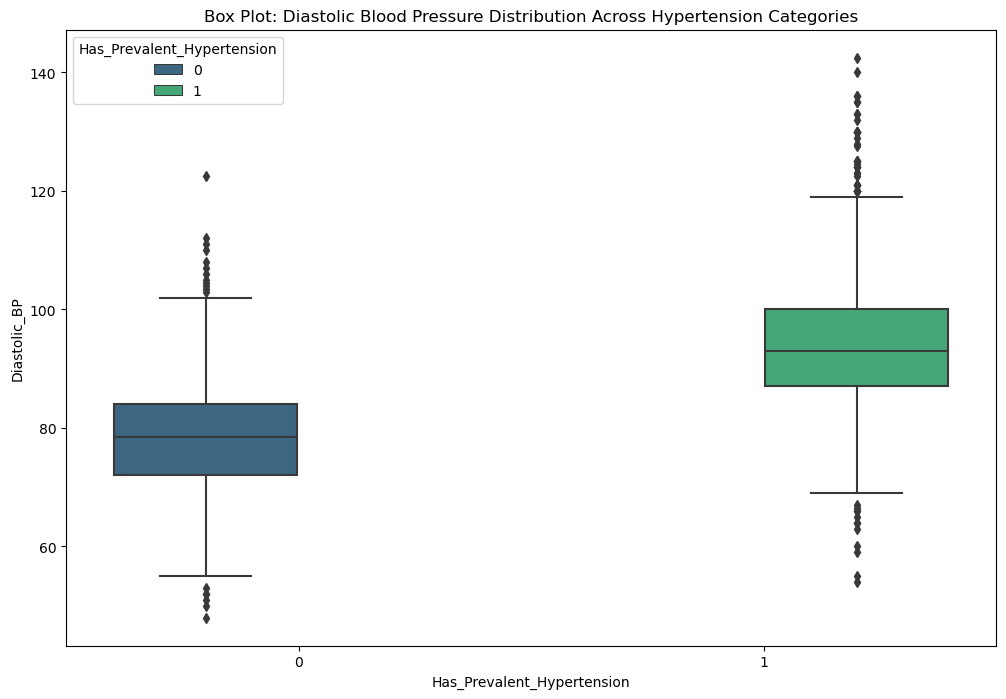

In [45]:
# Categorical Box Plot: Distribution of Diastolic Blood Pressure Across Hypertension Categories
plt.figure(figsize=(12, 8))
sns.boxplot(x=df['Has_Prevalent_Hypertension'], y=df['Diastolic_BP'], hue=df['Has_Prevalent_Hypertension'], palette='viridis')
plt.title('Box Plot: Diastolic Blood Pressure Distribution Across Hypertension Categories')
plt.show()


# Phase - 2

# Modeling

Describing the Dataset to get the insights of the data, for splitting of the dataset into test and train datasets.

In [46]:
df.describe()

,Gender,Age,Is_Smoker,Cigarettes_Per_Day,Systolic_BP,Diastolic_BP,Has_BP_Meds,Has_Prevalent_Hypertension,Glucose,Has_Diabetes,BMI,BMI_Category,Heart_Rate,Total_Cholestrol,Has_Prevalent_Stroke,Heart_Stroke
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,0.494101,8.941482,132.314028,82.893464,0.029259,0.310524,80.650071,0.025720,25.800205,1.019821,75.878716,236.494101,0.151958,0.151958
std,0.495022,8.572160,0.500024,11.902399,21.895950,11.910850,0.168552,0.462763,14.987211,0.158316,4.071041,0.953774,12.025185,43.404398,0.359023,0.359023
min,0.000000,32.000000,0.000000,0.000000,83.500000,48.000000,0.000000,0.000000,40.000000,0.000000,15.540000,0.000000,44.000000,107.000000,0.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,117.000000,75.000000,0.000000,0.000000,72.000000,0.000000,23.080000,0.000000,68.000000,206.000000,0.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,128.000000,82.000000,0.000000,0.000000,80.000000,0.000000,25.400000,1.000000,75.000000,234.000000,0.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,144.000000,89.875000,0.000000,1.000000,85.000000,0.000000,28.037500,2.000000,83.000000,262.000000,0.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,248.000000,142.500000,1.000000,1.000000,158.000000,1.000000,56.800000,3.000000,143.000000,464.000000,1.000000,1.000000


## Checking the perfect predictor

Here, we found that tht Has_Prevalant_Stroke is the perfect predictor as whenever the feature has certain value (in our case it is 0 or 1) , the outcome variable has corresponding value

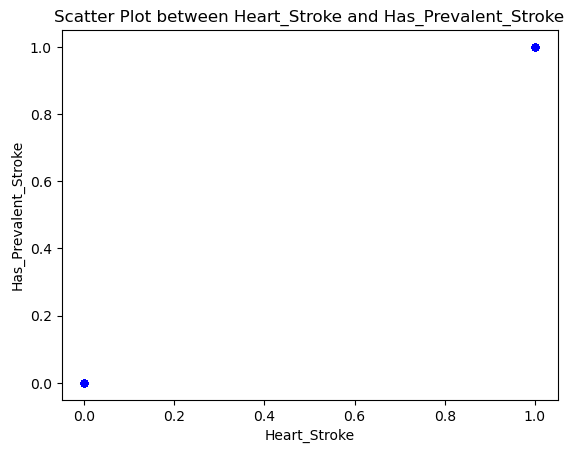

In [47]:

# Assuming df is your DataFrame containing the data
# Assuming feature1 and feature2 are the names of the two features you want to plot
# Plot a scatter plot between feature1 and feature2
df.plot.scatter(y='Has_Prevalent_Stroke', x='Heart_Stroke', color='blue', alpha=0.5)
plt.title('Scatter Plot between Heart_Stroke and Has_Prevalent_Stroke')
plt.xlabel('Heart_Stroke')
plt.ylabel('Has_Prevalent_Stroke')
plt.show()

# Dropping the features

Removing feature Heart_Stroke from X ,as the X will contain all the predicting features and it should NOT contain the outcome variable. In y, we have only taken the outcome variable because hence the Heart_Stroke feature will be used  to compare the results of training and testing sets.

In [48]:


X = df.drop(['Heart_Stroke','Has_Prevalent_Stroke'], axis = 1)
y = df['Heart_Stroke']


### Splitting of dataset into:
#### X_train: Input features for traning of model 
#### X_test: Input features for testing of the model 
#### y_train: Outcome variable for training set, for mapping input variable to output variable 
#### y_test : Outcome variable for testing set


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 ,shuffle=True)

# Describing the X_train , X_test , y_train , y_test

In [50]:
y_train.describe()

count    3390.000000
mean        0.153392
std         0.360418
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Heart_Stroke, dtype: float64

In [51]:
y_test.describe()

count    848.000000
mean       0.146226
std        0.353542
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Heart_Stroke, dtype: float64

In [52]:
X_train.describe()

,Gender,Age,Is_Smoker,Cigarettes_Per_Day,Systolic_BP,Diastolic_BP,Has_BP_Meds,Has_Prevalent_Hypertension,Glucose,Has_Diabetes,BMI,BMI_Category,Heart_Rate,Total_Cholestrol
count,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000,3390.000000
mean,0.422714,49.522124,0.499115,8.994395,132.341844,82.985251,0.029204,0.313274,80.693510,0.025074,25.836761,1.010619,75.995280,236.596755
std,0.494064,8.577177,0.500073,11.907122,21.942555,11.966780,0.168401,0.463893,14.859791,0.156372,4.107353,0.952953,11.932533,43.332587
min,0.000000,32.000000,0.000000,0.000000,83.500000,48.000000,0.000000,0.000000,40.000000,0.000000,15.540000,0.000000,45.000000,107.000000
25%,0.000000,42.000000,0.000000,0.000000,117.000000,74.625000,0.000000,0.000000,72.000000,0.000000,23.090000,0.000000,68.000000,206.000000
50%,0.000000,49.000000,0.000000,0.000000,128.000000,82.000000,0.000000,0.000000,80.000000,0.000000,25.380000,1.000000,75.000000,234.000000
75%,1.000000,56.000000,1.000000,20.000000,144.000000,90.000000,0.000000,1.000000,85.000000,0.000000,27.987500,2.000000,83.000000,262.000000
max,1.000000,70.000000,1.000000,60.000000,248.000000,140.000000,1.000000,1.000000,158.000000,1.000000,56.800000,3.000000,143.000000,453.000000


In [53]:
X_test.describe()

,Gender,Age,Is_Smoker,Cigarettes_Per_Day,Systolic_BP,Diastolic_BP,Has_BP_Meds,Has_Prevalent_Hypertension,Glucose,Has_Diabetes,BMI,BMI_Category,Heart_Rate,Total_Cholestrol
count,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000
mean,0.455189,49.836085,0.474057,8.729953,132.202830,82.526533,0.029481,0.299528,80.476415,0.028302,25.654068,1.056604,75.412736,236.083726
std,0.498282,8.552513,0.499621,11.888162,21.721148,11.684340,0.169251,0.458322,15.493897,0.165932,3.921475,0.956728,12.384891,43.713582
min,0.000000,33.000000,0.000000,0.000000,83.500000,55.000000,0.000000,0.000000,40.000000,0.000000,16.590000,0.000000,44.000000,113.000000
25%,0.000000,43.000000,0.000000,0.000000,117.500000,75.000000,0.000000,0.000000,72.000000,0.000000,22.927500,0.000000,67.000000,206.000000
50%,0.000000,49.000000,0.000000,0.000000,128.000000,81.000000,0.000000,0.000000,79.000000,0.000000,25.510000,1.000000,75.000000,234.000000
75%,1.000000,57.000000,1.000000,20.000000,143.125000,89.000000,0.000000,1.000000,85.000000,0.000000,28.150000,2.000000,82.000000,262.000000
max,1.000000,69.000000,1.000000,70.000000,243.000000,142.500000,1.000000,1.000000,158.000000,1.000000,45.790000,3.000000,130.000000,464.000000


# 1. Logistic Regression

Logistic Regression is a classification algorithm and it is best suited for performing Binary Classification, as in our case outcome variable can have two values either 0 or 1. 

We are applying the Logisitic Regression and fitting the X_train and y_train, we have also tuned the hyperparameter max_iter = 2000 , which will increase the maximum number of iterations that the optimization algorithm will perform before terminating regardless of whether convergence has been reached.

In [80]:
#Loading the Logistic Regression and fitting on training data
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test) #Predicting using X_test 

mse = mean_squared_error(y_test, y_pred)
print("Mean Squard Error:", mse)
accuracy_lr = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_lr)
print("Accuracy %: {:.2f}%".format(accuracy_lr * 100))

# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Calculate training accuracy
training_accuracy_lr = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", training_accuracy_lr)
print('\n')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("LR Confusion Matrix:")
print(conf_matrix)
print('\n')

# Calculate classification report
report = classification_report(y_test, y_pred)
print("LR Classification Report:")
print(report)

Mean Squard Error: 0.1403301886792453
Accuracy: 0.8596698113207547
Accuracy %: 85.97%
Training Accuracy: 0.8525073746312685


LR Confusion Matrix:
[[719   5]
 [114  10]]


LR Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.67      0.08      0.14       124

    accuracy                           0.86       848
   macro avg       0.76      0.54      0.53       848
weighted avg       0.83      0.86      0.81       848

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estim

## Drawing decision boundary for Logistic Regression 

#### Relationship between Age and Probability of Heart Stroke

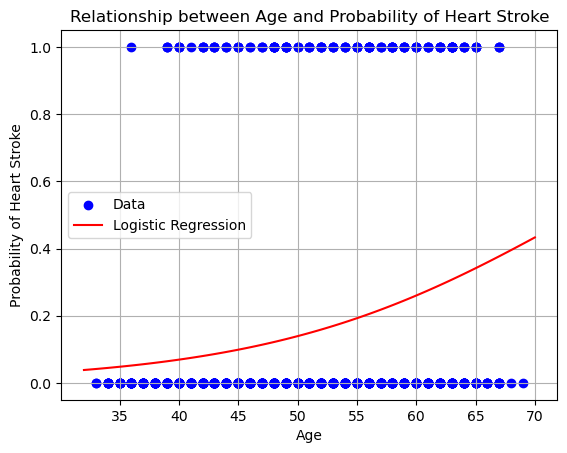

In [55]:
XX = df['Age'].values.reshape(-1, 1)  # Reshape to a column vector
yy = df['Heart_Stroke'].values

XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(XX_train, yy_train)

plt.scatter(XX_test, yy_test, color='blue', label='Data')

age_values = np.linspace(df['Age'].min(), df['Age'].max(), 100).reshape(-1, 1)
probabilities = model.predict_proba(age_values)[:, 1]  # Probability of heart stroke
plt.plot(age_values, probabilities, color='red', label='Logistic Regression')
plt.xlabel('Age')
plt.ylabel('Probability of Heart Stroke')
plt.title('Relationship between Age and Probability of Heart Stroke')
plt.legend()
plt.grid(True)
plt.show()

#### Relationship between Glucose and Probability of Heart Stroke

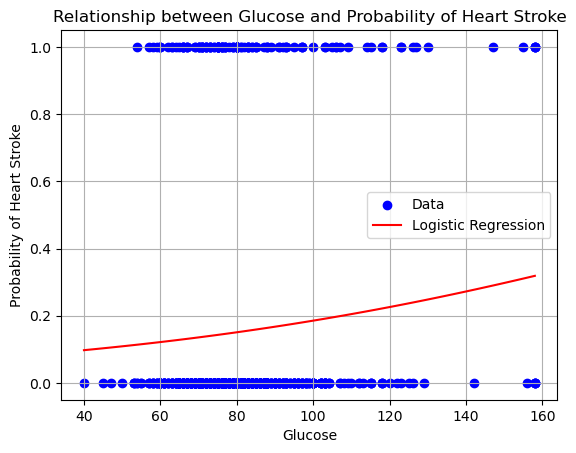

In [56]:
XX = df['Glucose'].values.reshape(-1, 1)  # Reshape to a column vector
yy = df['Heart_Stroke'].values

XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(XX_train, yy_train)

plt.scatter(XX_test, yy_test, color='blue', label='Data')

age_values = np.linspace(df['Glucose'].min(), df['Glucose'].max(), 100).reshape(-1, 1)
probabilities = model.predict_proba(age_values)[:, 1]  # Probability of heart stroke
plt.plot(age_values, probabilities, color='red', label='Logistic Regression')
plt.xlabel('Glucose')
plt.ylabel('Probability of Heart Stroke')
plt.title('Relationship between Glucose and Probability of Heart Stroke')
plt.legend()
plt.grid(True)
plt.show()

#### Relationship between Total Cholestrol and Probability of Heart Stroke

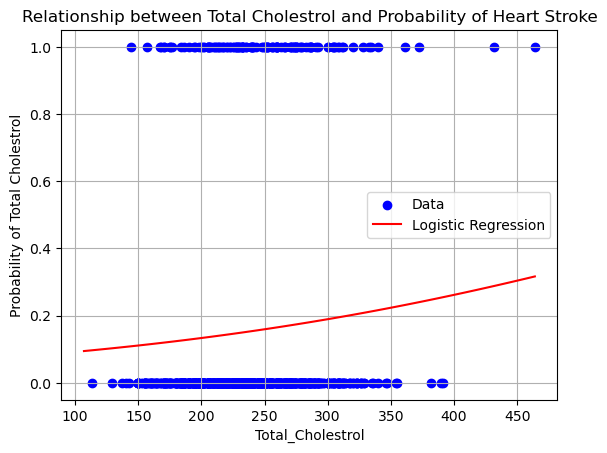

In [57]:
XX = df['Total_Cholestrol'].values.reshape(-1, 1)  # Reshape to a column vector
yy = df['Heart_Stroke'].values

XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(XX_train, yy_train)

plt.scatter(XX_test, yy_test, color='blue', label='Data')

age_values = np.linspace(df['Total_Cholestrol'].min(), df['Total_Cholestrol'].max(), 100).reshape(-1, 1)
probabilities = model.predict_proba(age_values)[:, 1]  # Probability of heart stroke
plt.plot(age_values, probabilities, color='red', label='Logistic Regression')
plt.xlabel('Total_Cholestrol')
plt.ylabel('Probability of Total Cholestrol')
plt.title('Relationship between Total Cholestrol and Probability of Heart Stroke')
plt.legend()
plt.grid(True)
plt.show()

# 2. Support Vector Machine

SVMs can handle both linear and nonlinear classification tasks through the use of different kernel functions and SVMs are less prone to overfitting, especially in high-dimensional spaces, due to the use of margin maximization during training.

We are using kernel = poly Which specifies the kernel type to be used in the algorithm. In this case, it's set to 'poly', indicating a polynomial kernel and degree to be 3, that specifies to polynomial kernels. It sets the degree of the polynomial kernel function. In our case, it's set to 3, meaning a cubic polynomial kernel.

In [58]:
svm_classifier = SVC(kernel='poly', degree=3)  

# Train the classifier
svm_classifier.fit(X_train, y_train) 

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_svm)
print("Accuracy %: {:.2f}%".format(accuracy_svm * 100))
# Calculate training accuracy
training_accuracy_svm = svm_classifier.score(X_train, y_train)
print("Training Accuracy:", training_accuracy_svm)

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print('\n')

# Calculate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.8537735849056604
Accuracy %: 85.38%
Training Accuracy: 0.8466076696165191
Confusion Matrix:
[[724   0]
 [124   0]]


Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       724
           1       0.00      0.00      0.00       124

    accuracy                           0.85       848
   macro avg       0.43      0.50      0.46       848
weighted avg       0.73      0.85      0.79       848



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Handling imbalanced class and Hyperparameter Tuning

As the classes are imbalanced , hence we have specified to balanced in terms of their contribution and done hyperparameter tuning for getting better Precision , recall and f1-score.

In [59]:
# Compute class weights to handle imbalance
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Create SVM classifier with adjusted parameters
svm_classifier = SVC(kernel='poly', degree=3, class_weight=dict(enumerate(class_weights)))

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred)
print("Accuracy after Hyperparameter Tuning:", accuracy_svm)
print("Accuracy % after Hyperparameter Tuning : {:.2f}%".format(accuracy_svm * 100))

# Calculate training accuracy
training_accuracy_svm = svm_classifier.score(X_train, y_train)
print("Training Accuracy after Hyperparameter Tuning:", training_accuracy_svm)


print('\n')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("SVM Confusion Matrix:")
print(conf_matrix)
print('\n')

# Calculate classification report
report = classification_report(y_test, y_pred)
print("SVM Classification Report:")
print(report)

Accuracy after Hyperparameter Tuning: 0.6591981132075472
Accuracy % after Hyperparameter Tuning : 65.92%
Training Accuracy after Hyperparameter Tuning: 0.6831858407079646


SVM Confusion Matrix:
[[486 238]
 [ 51  73]]


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.67      0.77       724
           1       0.23      0.59      0.34       124

    accuracy                           0.66       848
   macro avg       0.57      0.63      0.55       848
weighted avg       0.81      0.66      0.71       848



## Decision boundary for SVM

#### Drawing Decision boundary for Glucose and Probability of Heart Stroke

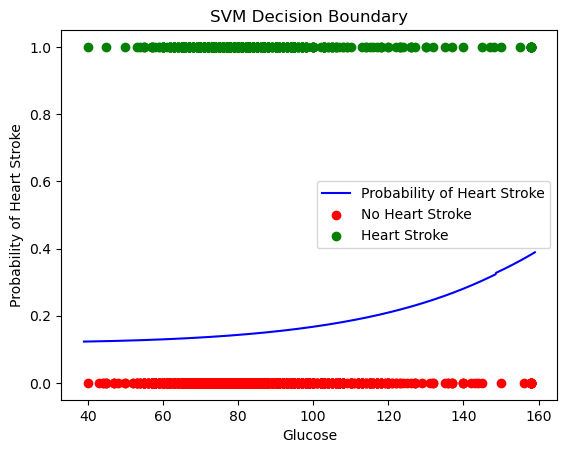

In [60]:
# Extracting 'Glucose' feature and 'Heart_Stroke' target column
X_subset = X[['Glucose']].values
y_subset = y

# Initialize SVM classifier
svm = SVC(kernel='poly', probability=True)

# Train the classifier
svm.fit(X_subset, y_subset)

# Meshgrid creation for decision boundary visualization
x_min, x_max = X_subset.min() - 1, X_subset.max() + 1
xx = np.linspace(x_min, x_max, 1000).reshape(-1, 1)
probabilities = svm.predict_proba(xx)

# Plot decision boundary
plt.plot(xx, probabilities[:, 1], color='blue', label='Probability of Heart Stroke')
plt.scatter(X_subset[y_subset == 0], y_subset[y_subset == 0], color='red', label='No Heart Stroke')
plt.scatter(X_subset[y_subset == 1], y_subset[y_subset == 1], color='green', label='Heart Stroke')
plt.xlabel('Glucose')
plt.ylabel('Probability of Heart Stroke')
plt.title('SVM Decision Boundary')
plt.legend()
plt.show()


#### Drawing Decision boundary for Age and Probability of Heart Stroke

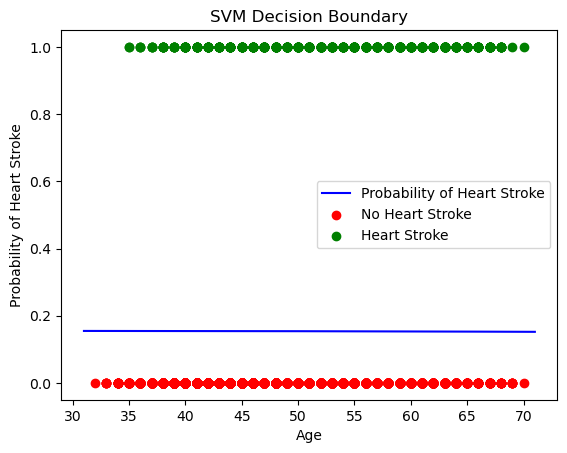

In [61]:
# Extracting 'Age' feature and 'Heart_Stroke' target column
X_subset = X[['Age']].values
y_subset = y

# Initialize SVM classifier
svm = SVC(kernel='poly', probability=True)

# Train the classifier
svm.fit(X_subset, y_subset)

# Meshgrid creation for decision boundary visualization
x_min, x_max = X_subset.min() - 1, X_subset.max() + 1
xx = np.linspace(x_min, x_max, 1000).reshape(-1, 1)
probabilities = svm.predict_proba(xx)

# Plot decision boundary
plt.plot(xx, probabilities[:, 1], color='blue', label='Probability of Heart Stroke')
plt.scatter(X_subset[y_subset == 0], y_subset[y_subset == 0], color='red', label='No Heart Stroke')
plt.scatter(X_subset[y_subset == 1], y_subset[y_subset == 1], color='green', label='Heart Stroke')
plt.xlabel('Age')
plt.ylabel('Probability of Heart Stroke')
plt.title('SVM Decision Boundary')
plt.legend()
plt.show()


#### Drawing Decision boundary for Total Cholestrol and Probability of Heart Stroke

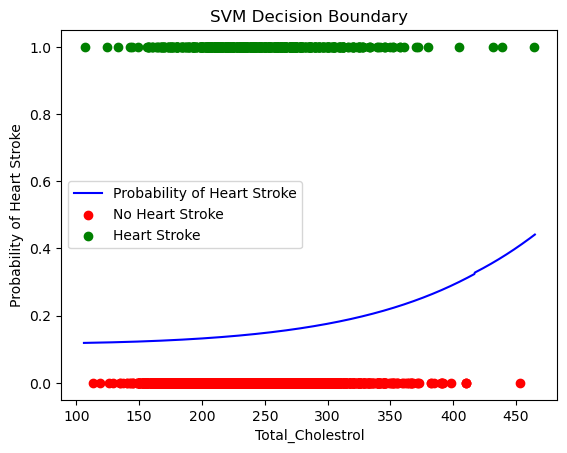

In [62]:
# Extracting 'Total_Cholestrol' feature and 'Heart_Stroke' target column
X_subset = X[['Total_Cholestrol']].values
y_subset = y

# Initialize SVM classifier
svm = SVC(kernel='poly', probability=True)

# Train the classifier
svm.fit(X_subset, y_subset)

# Meshgrid creation for decision boundary visualization
x_min, x_max = X_subset.min() - 1, X_subset.max() + 1
xx = np.linspace(x_min, x_max, 1000).reshape(-1, 1)
probabilities = svm.predict_proba(xx)

# Plot decision boundary
plt.plot(xx, probabilities[:, 1], color='blue', label='Probability of Heart Stroke')
plt.scatter(X_subset[y_subset == 0], y_subset[y_subset == 0], color='red', label='No Heart Stroke')
plt.scatter(X_subset[y_subset == 1], y_subset[y_subset == 1], color='green', label='Heart Stroke')
plt.xlabel('Total_Cholestrol')
plt.ylabel('Probability of Heart Stroke')
plt.title('SVM Decision Boundary')
plt.legend()
plt.show()


# 3. Random Forest Classifier

Random Forests aggregates the predictions of multiple decision trees, they reduce overfitting and variance, resulting in more robust and accurate predictions. It also provides the measure of feature importance, which indicates the contribution of each feature to the model's predictive performance. Additionally, it capture non-linear relationships between features and the target variable effectively. This flexibility makes it suitable for a wide range of datasets with complex relationships.




We have used Random Forest Classifier with 100 decision trees (n_estimators=100) and defined the random seed to 42 (random_state=42)

In [63]:
# Create Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) 

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy_rfc = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_rfc)
print("Accuracy%: {:.2f}%".format(accuracy_rfc * 100))


# Make predictions on the training data
y_train_pred = rf_classifier.predict(X_train)

# Calculate training accuracy
training_accuracy_rfc = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", training_accuracy_rfc)
print('\n')

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("RF Confusion Matrix:")
print(conf_matrix)
print('\n')

# Calculate classification report
report = classification_report(y_test, y_pred)
print("RF Classification Report:")
print(report)

Accuracy: 0.8466981132075472
Accuracy%: 84.67%
Training Accuracy: 1.0


RF Confusion Matrix:
[[710  14]
 [116   8]]


RF Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       724
           1       0.36      0.06      0.11       124

    accuracy                           0.85       848
   macro avg       0.61      0.52      0.51       848
weighted avg       0.79      0.85      0.80       848



### Hyperparameter Tuning for Random Forest Classifier

We are tuning the hyperparameters as we were getting training accuracy of 1.0, hence we have defined the max_depth , min_samples_split and min_samples_leaf and used GridSearchCv for finding best hyperparameter

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find best hyperparameters
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the classifier with best hyperparameters
rf_classifier_best = RandomForestClassifier(random_state=42, **best_params)
rf_classifier_best.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier_best.predict(X_test)

# Calculate accuracy
accuracy_rfc = accuracy_score(y_test, y_pred)
print("Accuracy after Hyperparameter Tuning:", accuracy_rfc)
print("Accuracy% after Hyperparameter Tuning: {:.2f}%".format(accuracy_rfc * 100))

# Make predictions on the training data
y_train_pred = rf_classifier_best.predict(X_train)

# Calculate training accuracy
training_accuracy_rfc = accuracy_score(y_train, y_train_pred)
print("Training Accuracy after Hyperparameter Tuning:", training_accuracy_rfc)
print('\n')

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("RF Confusion Matrix :")
print(conf_matrix)
print('\n')

# Calculate classification report
report = classification_report(y_test, y_pred)
print("RF Classification Report:")
print(report)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy after Hyperparameter Tuning: 0.8537735849056604
Accuracy% after Hyperparameter Tuning: 85.38%
Training Accuracy after Hyperparameter Tuning: 0.8867256637168142


RF Confusion Matrix :
[[718   6]
 [118   6]]


RF Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.50      0.05      0.09       124

    accuracy                           0.85       848
   macro avg       0.68      0.52      0.50       848
weighted avg       0.81      0.85      0.80       848



## Plotting Random Forest Tree

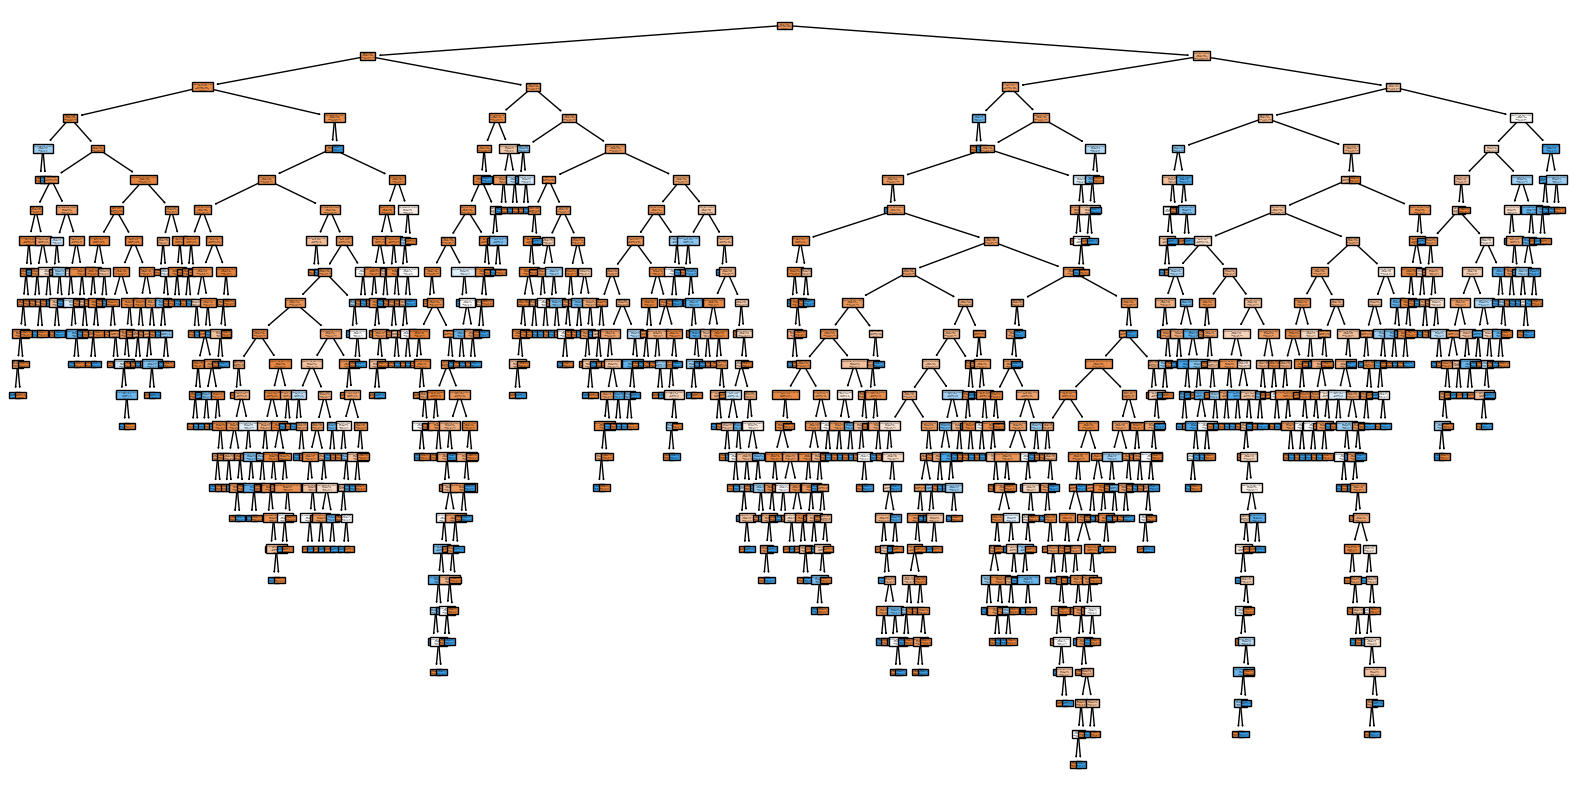

In [65]:
rf = RandomForestClassifier()
rf.fit(X, y)
plt.figure(figsize=(20, 10))
feature_names = ['Gender', 'Age', 'Is_Smoker', 'Cigarettes_Per_Day', 'Systolic_BP', 'Diastolic_BP', 'Has_BP_Meds', 'Has_Prevalent_Hypertension', 'Glucose', 'Has_Diabetes', 'BMI', 'BMI_Category', 'Heart_Rate', 'Total_Cholesterol']

plot_tree(rf.estimators_[0], feature_names = feature_names, class_names=['0', '1'], filled=True)
plt.show()

# 4. Naive Bayes Classifier

Naive Bayes classifiers can performs well with small datasets. They are robust to small sample sizes and can generalize well even with limited training data as in our case the dataset is relatively small hence we have used Navive Bayes and it is less sensitive to irrelevant features because they assume feature independence.

We have used Gaussian Naive Bayes Classifier as it performs well even with small datasets. It's robust to the presence of irrelevant features and can generalize well with limited training data and has no hyperparameters to tune, unlike many other classifiers. Gaussian Naive Bayes Classifier strong independence assumptions can make it less prone to overfitting compared to more complex models

In [66]:
# Initialize Naive Bayes classifier
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_nb)
print("Accuracy%: {:.2f}%".format(accuracy_nb * 100))

model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Calculate training accuracy
training_accuracy_nb = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", training_accuracy_nb)


# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("NB Confusion Matrix:")
print(conf_matrix)
print('\n')

# Calculate classification report
report = classification_report(y_test, y_pred)
print("NB Classification Report:")
print(report)

Accuracy: 0.8160377358490566
Accuracy%: 81.60%
Training Accuracy: 0.8153392330383481
NB Confusion Matrix:
[[661  63]
 [ 93  31]]


NB Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       724
           1       0.33      0.25      0.28       124

    accuracy                           0.82       848
   macro avg       0.60      0.58      0.59       848
weighted avg       0.80      0.82      0.81       848



## Drawing ROC Curve and Precision-Recall Curve for Naive Bayes Classifier

Confusion Matrix:
[[661  63]
 [ 93  31]]


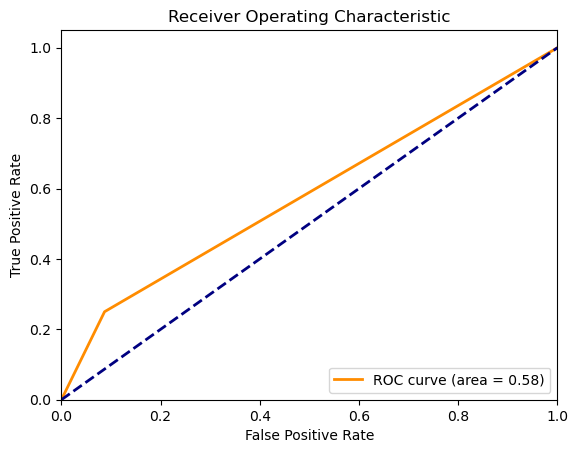

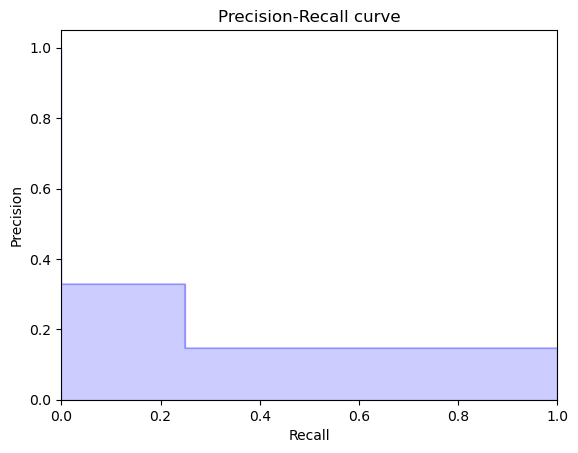

In [67]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.show()

# 5. Decision Tree classifier

KNN performs well in situations where the decision boundary is highly irregular or localized, as it relies on local information to make predictions, it can handle imbalanced datasets effectively by considering the local neighborhood of each data point rather than the global distribution of classes. KNN performs well on small to medium-sized datasets, where the cost of storing and querying the training data is manageable.

We have  specified random state of 42. This random state ensures reproducibility of results, as it sets the seed for the random number generator used by the decision tree algorithm.

In [68]:
# Initialize Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred)
print("Initial Accuracy:", accuracy_dt)
print("Initial Accuracy %: {:.2f}%".format(accuracy_dt * 100))

model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Calculate training accuracy
training_accuracy_dt = accuracy_score(y_train, y_train_pred)
print("Initial Training Accuracy:", training_accuracy_dt)
print('\n')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("DT Confusion Matrix:")
print(conf_matrix)
print('\n')

# Calculate classification report
report = classification_report(y_test, y_pred)
print("DT Classification Report:")
print(report)

Initial Accuracy: 0.7653301886792453
Initial Accuracy %: 76.53%
Initial Training Accuracy: 1.0


DT Confusion Matrix:
[[616 108]
 [ 91  33]]


DT Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       724
           1       0.23      0.27      0.25       124

    accuracy                           0.77       848
   macro avg       0.55      0.56      0.55       848
weighted avg       0.78      0.77      0.77       848



## Adjusting Hyperparameters for Decision Tree

As, the model is overfitting hence , we are adjusting Hyperparamter for the decison tree , here we have given the values for max_depth , min_sample_split , min_samples_leaf and max_features and used GridSearchCV for choosing the best values for hyperparameter tuning

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


# Define the hyperparameters grid to search
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the testing data using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred)
print("Accuracy with best hyperparameters:", accuracy_dt)
print("Accuracy with best hyperparameters %: {:.2f}%".format(accuracy_dt * 100))
# Calculate training accuracy
training_accuracy_dt = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", training_accuracy_dt)
print('\n')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("DT Confusion Matrix:")
print(conf_matrix)
print('\n')

# Calculate classification reportde
report = classification_report(y_test, y_pred)
print("DT Classification Report:")
print(report)

Best Hyperparameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10}
Accuracy with best hyperparameters: 0.8525943396226415
Accuracy with best hyperparameters %: 85.26%
Training Accuracy: 1.0


DT Confusion Matrix:
[[719   5]
 [120   4]]


DT Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.44      0.03      0.06       124

    accuracy                           0.85       848
   macro avg       0.65      0.51      0.49       848
weighted avg       0.80      0.85      0.79       848



## Visualizing Decision Tree 

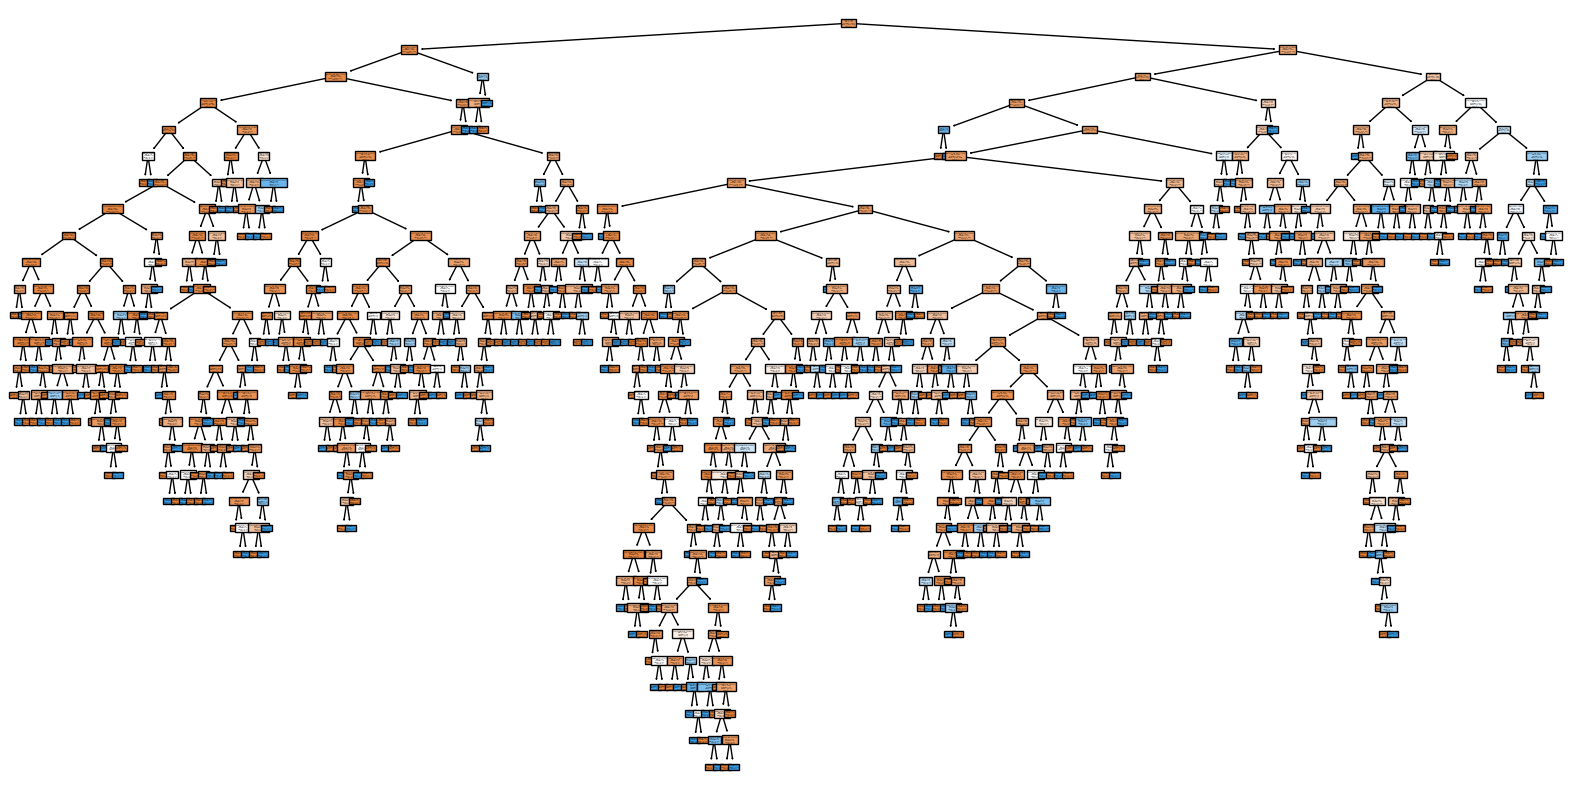

In [70]:
# Visualize the decision tree
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)
feature_name = ['Gender', 'Age', 'Is_Smoker', 'Cigarettes_Per_Day', 'Systolic_BP', 'Diastolic_BP', 'Has_BP_Meds', 'Has_Prevalent_Hypertension', 'Glucose', 'Has_Diabetes', 'BMI', 'BMI_Category', 'Heart_Rate', 'Total_Cholesterol']

plt.figure(figsize=(20,10))
plot_tree(model, feature_names = feature_name , class_names=['0', '1'], filled=True)
plt.show()

# 6. KNN Classifier 

KNN can handle imbalanced datasets effectively by considering the local neighborhood of each data point rather than the global distribution of classes. It performs well on small to medium-sized datasets, where the cost of storing and querying the training data is manageable.

Here, we have defined the number of neigbours to be 5, we have tested with other values as well but got most optimal result with it.

In [71]:
# Initialize KNN classifier
model = KNeighborsClassifier(n_neighbors= 5)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_knn)
print("Accuracy%: {:.2f}%".format(accuracy_knn * 100))

# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Calculate training accuracy
training_accuracy_knn = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", training_accuracy_knn)
print('\n')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("KNN Confusion Matrix:")
print(conf_matrix)
print('\n')

# Calculate classification report
report = classification_report(y_test, y_pred)
print("KNN Classification Report:")
print(report)

Accuracy: 0.8349056603773585
Accuracy%: 83.49%
Training Accuracy: 0.8643067846607669


KNN Confusion Matrix:
[[699  25]
 [115   9]]


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       724
           1       0.26      0.07      0.11       124

    accuracy                           0.83       848
   macro avg       0.56      0.52      0.51       848
weighted avg       0.77      0.83      0.79       848



/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

## Vizualizing Probability of Heart Stroke with reference to Age 

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


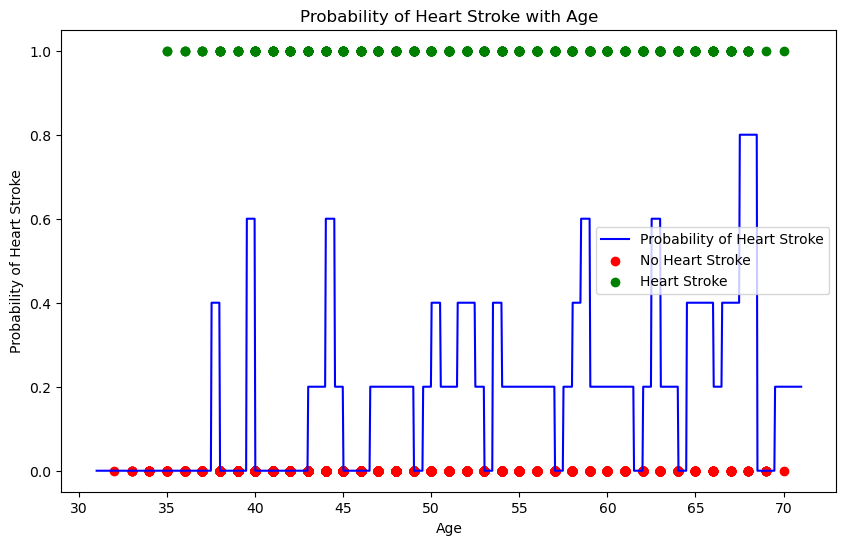

In [72]:
# Initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
X_subset = df[['Age']]
y_subset = y

# Train the classifier
knn.fit(X_subset, y_subset)

plt.figure(figsize=(10, 6))
# Create a meshgrid to plot decision boundaries
x_min, x_max = X_subset.min() - 1, X_subset.max() + 1
xx = np.linspace(x_min, x_max, 1000).reshape(-1, 1)

# Make predictions on the meshgrid points
Z = knn.predict_proba(xx)[:, 1]

# Plot the decision boundary
plt.plot(xx, Z, color='blue', label='Probability of Heart Stroke')

# Plot the data points
plt.scatter(X_subset[y_subset == 0], y_subset[y_subset == 0], color='red', label='No Heart Stroke')
plt.scatter(X_subset[y_subset == 1], y_subset[y_subset == 1], color='green', label='Heart Stroke')

plt.xlabel('Age')
plt.ylabel('Probability of Heart Stroke')
plt.title('Probability of Heart Stroke with Age')
plt.legend()
plt.show()

# 7. XGBoost Classifier 

XGBoost includes regularization techniques such as L1 and L2 regularization (via the alpha and lambda parameters) and tree pruning to remove splits that have little or no impact on improving model performance.That prevents overfitting and improve generalization.XGBoost consistently performs well across a wide range of datasets and competitions.

In [73]:
# Initialize XGBoost classifier
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)


# Calculate accuracy
accuracy_XGB = accuracy_score(y_test, y_pred)
print('Initial Accuracy:',accuracy_XGB )

print("Initial Accuracy %: {:.2f}%".format(accuracy_XGB * 100))
y_train_pred = model.predict(X_train)

# Calculate training accuracy
training_accuracy_XGB = accuracy_score(y_train, y_train_pred)

print("Training Accuracy:", training_accuracy_XGB)


# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("XGB Confusion Matrix:")
print(conf_matrix)
print('\n')

# Calculate classification report
report = classification_report(y_test, y_pred)
print("XGB Classification Report:")
print(report)


Initial Accuracy: 0.8160377358490566
Initial Accuracy %: 81.60%
Training Accuracy: 0.9929203539823008
XGB Confusion Matrix:
[[679  45]
 [111  13]]


XGB Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       724
           1       0.22      0.10      0.14       124

    accuracy                           0.82       848
   macro avg       0.54      0.52      0.52       848
weighted avg       0.77      0.82      0.79       848



## Hyperparameter Tuning for XGBoost Classifier

The model was overfitting, hence we have tuned the hyperparameter hence provieded set of values for max_depth , learning_rate , n_estimators , gamma and min_child_weight. The grid_search was used for finding the best parametes.

In [74]:
# Initialize XGBoost classifier
model = xgb.XGBClassifier()

# Define the grid of hyperparameters to search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 2, 3],
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy_XGB = accuracy_score(y_test, y_pred)
print('Accuracy after Hyperparameter Tuning:', accuracy_XGB)
print("Accuracy with best hyperparameters %: {:.2f}%".format(accuracy_XGB * 100))
print('\n')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("XGB Confusion Matrix:")
print(conf_matrix)
print('\n')

# Calculate classification report
report = classification_report(y_test, y_pred)
print("XGB Classification Report:")
print(report)

Best Hyperparameters: {'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 2, 'n_estimators': 200}
Accuracy after Hyperparameter Tuning: 0.8514150943396226
Accuracy with best hyperparameters %: 85.14%


XGB Confusion Matrix:
[[718   6]
 [120   4]]


XGB Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.40      0.03      0.06       124

    accuracy                           0.85       848
   macro avg       0.63      0.51      0.49       848
weighted avg       0.79      0.85      0.79       848



## Vizualizing SHAP Values for XGBoost Classifier

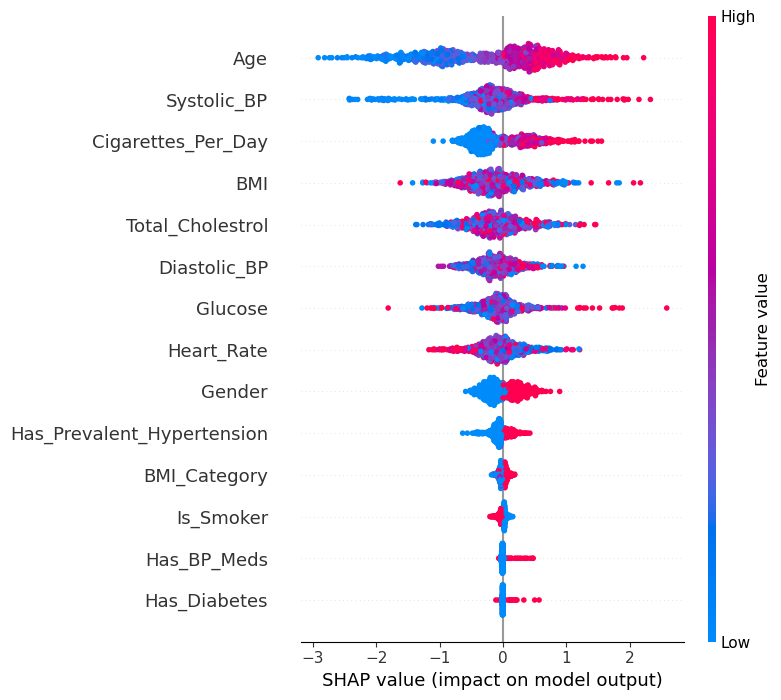

In [75]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
# Explain model predictions using SHAP
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test)

# 8. Gradient Boosting Classifier

Gradient Boosting Classifier often provides high predictive accuracy and it can handle heterogeneous data types (e.g., numerical, categorical) without requiring extensive data preprocessing.

Here we have defined, n_estimators which is The number of boosting stages (trees) to be used in the ensemble. Increasing the number of estimators generally improves the performance of the model, in our case we have set it to 100, which means the ensemble will consist of 100 decision trees. A lower learning rate makes the model more robust by shrinking the contribution of each tree, but it requires more trees to achieve the same level of performance we have set it to 0.1, which is a commonly used value. We've defined the random state to be 42, the results of the algorithm will be reproducible across multiple runs with the same data and parameters. This is important for ensuring consistent results and facilitating debugging and comparison of different models.

In [76]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


# Create and train a Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gb_clf.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_gb)
print("Accuracy%: {:.2f}%".format(accuracy_gb * 100))
y_train_pred = gb_clf.predict(X_train)

# Calculate training accuracy
training_accuracy_gb = accuracy_score(y_train, y_train_pred)

print("Training Accuracy:", training_accuracy_gb)
print('\n')


# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("GB Confusion Matrix:")
print(conf_matrix)
print('\n')

# Calculate classification report
report = classification_report(y_test, y_pred)
print("GB Classification Report:")
print(report)

Accuracy: 0.8490566037735849
Accuracy%: 84.91%
Training Accuracy: 0.876401179941003


GB Confusion Matrix:
[[709  15]
 [113  11]]


GB Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       724
           1       0.42      0.09      0.15       124

    accuracy                           0.85       848
   macro avg       0.64      0.53      0.53       848
weighted avg       0.80      0.85      0.80       848



## Vizualizing Learning Graph for Gradient Boosting Classifier

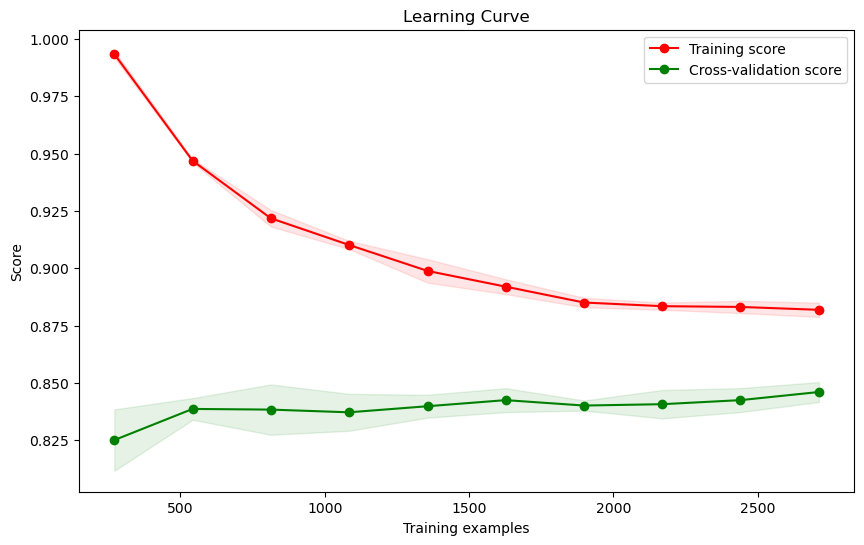

In [77]:
# Define a function to plot learning curve
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.title("Learning Curve")
    plt.legend(loc="best")
    plt.show()

# Visualize learning curve
plot_learning_curve(GradientBoostingClassifier(), X_train, y_train)

# Visualizing Model Training accuracy 

Comparing the Model training accuraccy using Bar graph 

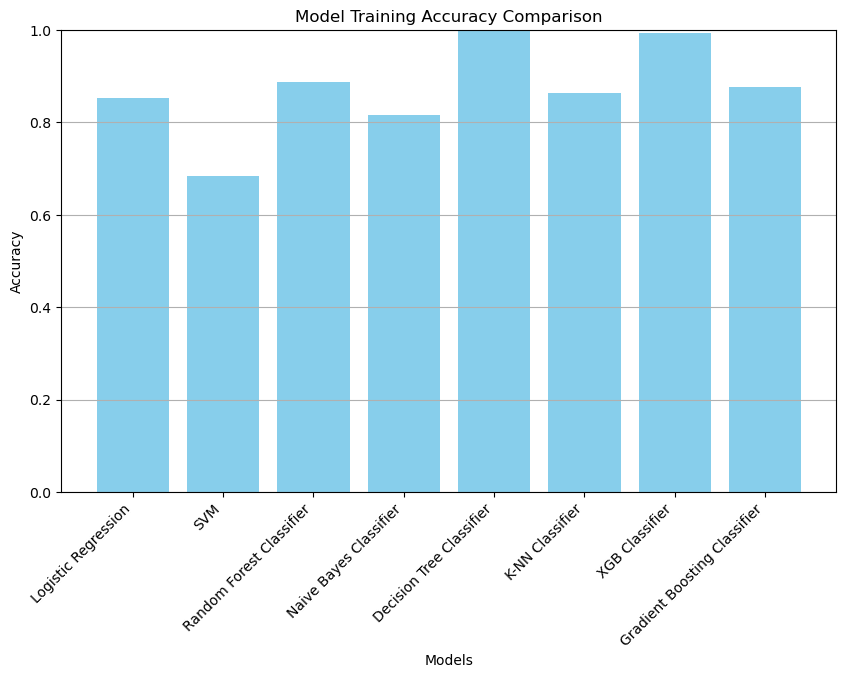

<Figure size 3000x1500 with 0 Axes>

In [78]:
models = ['Logistic Regression', 'SVM', 'Random Forest Classifier', 'Naive Bayes Classifier' ,
         'Decision Tree Classifier' , 'K-NN Classifier' , 'XGB Classifier' , 'Gradient Boosting Classifier']

# Accuracy scores
accuracies = [training_accuracy_lr , training_accuracy_svm , training_accuracy_rfc , training_accuracy_nb,
             training_accuracy_dt , training_accuracy_knn , training_accuracy_XGB , training_accuracy_gb]
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Training Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 (assuming accuracy is in the range [0, 1])
plt.grid(axis='y')  # Add gridlines on the y-axis
plt.figure(figsize=(30, 15)) 
plt.show()

# Visualizing Model Testing accuracy 

Comparing the model accuracy on testing data set

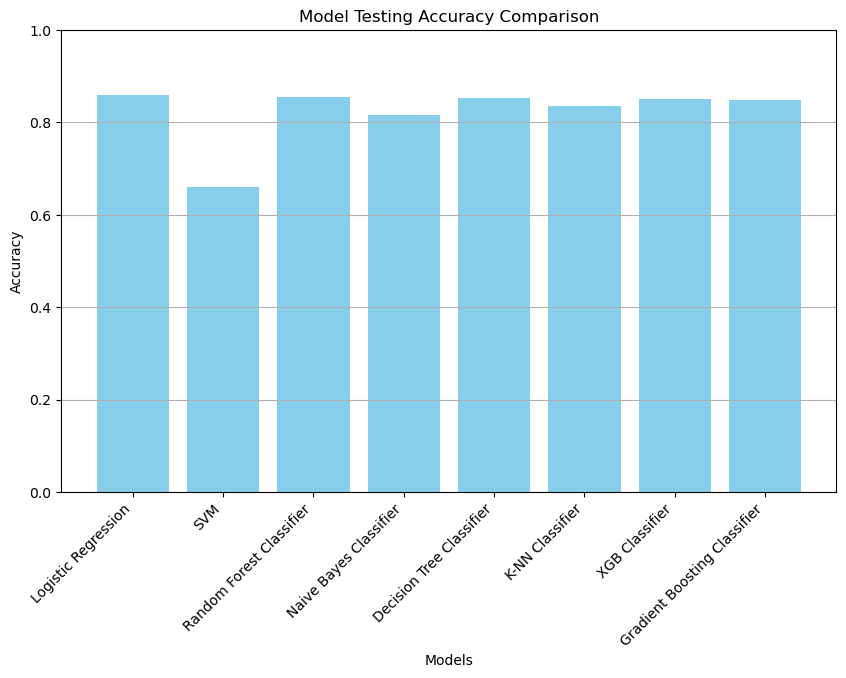

<Figure size 3000x1500 with 0 Axes>

In [79]:
models = ['Logistic Regression', 'SVM', 'Random Forest Classifier', 'Naive Bayes Classifier' ,
         'Decision Tree Classifier' , 'K-NN Classifier' , 'XGB Classifier' , 'Gradient Boosting Classifier']

# Accuracy scores
accuracies = [accuracy_lr , accuracy_svm , accuracy_rfc , accuracy_nb,
             accuracy_dt , accuracy_knn , accuracy_XGB , accuracy_gb]
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Testing Accuracy Comparison')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1 (assuming accuracy is in the range [0, 1])
plt.grid(axis='y')  # Add gridlines on the y-axis
plt.figure(figsize=(30, 15)) 
plt.show()

In [82]:
file_path = '/Users/krishnanand/Desktop/Cleaned_Heart_disease.csv'

# Export the DataFrame to a CSV file
df.to_csv(file_path, index=False)  # Set index=False to exclude row indices from the CSV file